Data preparation:
* Load data: Load data from various sources such as CSV files, databases or APIs.
* Clean data: Remove missing values, duplicates and inconsistent data.
* Transform data: Perform data manipulations such as converting data types, creating new variables and aggregating data.
* Explore data: Examine the distribution of data, Identify outliers and correlations between variables.

Load data: Load data from various sources such as CSV files, databases or APIs.


In [3]:
# import the necessary libraries you need for your analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

In [5]:
# read in csv file and display first 5 rows of datset
df = pd.read_csv("/Users/aileenpfleiderer/Desktop/GitHub_datasets_Aileen/github_users.csv")
df.head()

,login,avatar_url,type,site_admin,name,company,blog,location,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,torvalds,https://avatars.githubusercontent.com/u/102402...,User,False,Linus Torvalds,Linux Foundation,NaN,"Portland, OR",NaN,NaN,NaN,NaN,7.00,0.00,"192,033.00",0.00,2011-09-03T15:26:22Z,2023-08-15T05:21:45Z
1,yyx990803,https://avatars.githubusercontent.com/u/499550...,User,False,Evan You,vuejs,http://evanyou.me,Singapore,NaN,NaN,NaN,NaN,185.00,72.00,"95,692.00",95.00,2010-11-28T01:05:40Z,2023-09-26T13:44:39Z
2,gaearon,https://avatars.githubusercontent.com/u/810438...,User,False,dan,@bluesky-social,NaN,NaN,dan.abramov@gmail.com,NaN,NaN,dan_abramov,267.00,78.00,"84,989.00",172.00,2011-05-25T18:18:31Z,2023-08-28T19:01:10Z
3,ruanyf,https://avatars.githubusercontent.com/u/905434...,User,False,Ruan YiFeng,NaN,https://twitter.com/ruanyf,"Shanghai, China",yifeng.ruan@gmail.com,NaN,NaN,NaN,68.00,27.00,"76,530.00",0.00,2011-07-10T01:07:17Z,2023-09-28T06:43:20Z
4,peng-zhihui,https://avatars.githubusercontent.com/u/129948...,User,False,稚晖,HUAWEI Research,http://www.pengzhihui.xyz,Shanghai,peng-zhihui@foxmail.com,NaN,野生钢铁侠本侠。,NaN,56.00,0.00,"73,963.00",9.00,2015-06-22T04:59:39Z,2023-10-04T03:24:07Z


In [6]:
# check which columns are included in our dataframe
df.columns

Index(['login', 'avatar_url', 'type', 'site_admin', 'name', 'company', 'blog',
       'location', 'email', 'hireable', 'bio', 'twitter_username',
       'public_repos', 'public_gists', 'followers', 'following', 'created_at',
       'updated_at'],
      dtype='object')

In [7]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df.shape

(150202, 18)

Clean data: Remove missing values, duplicates and inconsistent data.

In [8]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150202 entries, 0 to 150201
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   login             150202 non-null  object 
 1   avatar_url        150202 non-null  object 
 2   type              150202 non-null  object 
 3   site_admin        150202 non-null  bool   
 4   name              138120 non-null  object 
 5   company           73999 non-null   object 
 6   blog              99112 non-null   object 
 7   location          110605 non-null  object 
 8   email             69007 non-null   object 
 9   hireable          38183 non-null   object 
 10  bio               96058 non-null   object 
 11  twitter_username  50959 non-null   object 
 12  public_repos      150202 non-null  float64
 13  public_gists      150202 non-null  float64
 14  followers         150202 non-null  float64
 15  following         150202 non-null  float64
 16  created_at        15

**Data-types**  
- object: We see that we have a lot of object data-types in our dataset. This means, we have strings (meaning text) or mixed data-types in these columns. 

#   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   login             150202 non-null  object 
 1   avatar_url        150202 non-null  object 
 2   type              150202 non-null  object   
 4   name              138120 non-null  object 
 5   company           73999 non-null   object 
 6   blog              99112 non-null   object 
 7   location          110605 non-null  object 
 8   email             69007 non-null   object 
 9   hireable          38183 non-null   object 
 10  bio               96058 non-null   object 
 11  twitter_username  50959 non-null   object 
 16  created_at        150202 non-null  object 
 17  updated_at        150202 non-null  object 

Do we need to change our data-types into a date format or sth. else?. We will keep that in mind and come back to this later.  

- int64: We do not have any int values so far
  
- bool: Reg. the side_admin-value: 
The boolean type indicates, that values are either True or False in these columns - which makes sense when looking at our column names and descriptions:
Not everyone can become a "site_admin" on GitHub. This role is typically granted by GitHub itself, based on criteria such as expertise, experience, and contributions to the GitHub community. Site administrators are selected individuals with extensive knowledge of the GitHub platform, software development, open-source communities, and platform administration. There is no public application process; individuals are usually invited by GitHub to assume the role of site administrator.


 **Missing values**  
- Below the header *Non-Null* we see how many non-null values we have per column.  Except for description, we have 40840 non-null values in each column which is exactly the same number as we have rows.   
 Meaning: We only seem to have missing values in the description column.

- Regarding our shape, we see that we have 150202 values in total: (150202, 18)

#   Column            Non-Null Count   Dtype  
---  ------            --------------   -----    
 4   name              138120 non-null  object 
 5   company           73999 non-null   object 
 6   blog              99112 non-null   object 
 7   location          110605 non-null  object 
 8   email             69007 non-null   object 
 9   hireable          38183 non-null   object 
 10  bio               96058 non-null   object 
 11  twitter_username  50959 non-null   object 

the above values: name, company, blog, location, email, hireable, bio and twitter_username do have missings

- the following values do not have any missings: login, avatur_url, type, site_admin, public_repos, public_gists, followers, following, 
created_at, updated_at

#   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   login             150202 non-null  object 
 1   avatar_url        150202 non-null  object 
 2   type              150202 non-null  object 
 3   site_admin        150202 non-null  bool   
 12  public_repos      150202 non-null  float64
 13  public_gists      150202 non-null  float64
 14  followers         150202 non-null  float64
 15  following         150202 non-null  float64
 16  created_at        150202 non-null  object 
 17  updated_at        150202 non-null  object 



In [9]:
# type
# needs to be converted to string and "Organization"-rows needs to be deleted 
df['type'] = df['type'].astype(str)
print(df.dtypes)
# check datatypes

login                object
avatar_url           object
type                 object
site_admin             bool
name                 object
company              object
blog                 object
location             object
email                object
hireable             object
bio                  object
twitter_username     object
public_repos        float64
public_gists        float64
followers           float64
following           float64
created_at           object
updated_at           object
dtype: object


In [10]:
print(df["type"].dtype) #object
unique_values_type = df["type"].unique()
for value in unique_values_type:
    print(f"Type of {value}: {type(value)}")

#In this case, the column does not contain any Python objects such as lists or dictionaries, but only character strings. 
#Therefore, there is no 
#need to convert these strings into other data types, as they are already recognized as "object" (string).

object
Type of User: <class 'str'>
Type of Organization: <class 'str'>


In [11]:
 #check bool: Reg. the side_admin-value: 
count_uniques_site_admin=df["site_admin"].nunique()
print(count_uniques_site_admin)
# reg. site_admin there are two uniques values. check! TRUE and FALSE

2


In [12]:
#count how many TRUE and how many FALSE reg. site_admin 
count_uniques_value_count=df["site_admin"].value_counts()
print(count_uniques_value_count)
#504 True, that means that 504 users listed in this dataset are site_admins
#keep that in mind for later suggestions

site_admin
False    149698
True        504
Name: count, dtype: int64


In [13]:
#to think about later: are there are correlations reg. site_admin and success reg. username and repo
#keep in mind! 

In [14]:
#check how to deal with the missings here
print(df["name"].isnull().sum())
print(df["company"].isnull().sum())
print(df["blog"].isnull().sum())
print(df["location"].isnull().sum())
print(df["email"].isnull().sum())
print(df["hireable"].isnull().sum())
print(df["twitter_username"].isnull().sum())
print(df["bio"].isnull().sum())



12082
76203
51090
39597
81195
112019
99243
54144


In [15]:
# are there any values of the having missings one, we can decide to delete or create a new df without them? 
# lets check
# the above values: name, company, blog, location, email, hireable, bio and twitter_username do have missings

In [16]:
# checking how to deal with the missings here

# delete, or keep, but create new df without this variable
# name is the complete private name, so for privacy reasons, some have not added them,
# so we do not want them in our study for privacy reasons
# same with # company
# same with # blog
# same with # # email

# deal with the missings

# keep in mind for later research
# hireable : keep in mind for later research (112019 missings)
# location: keep in mind for later research (39597 missings)

#NLP????
# bio: interesting information and hashtags reg. interests of user, keep in mind for NLP component extractions maybe?!
# (54144 missings)
# twitter_username (99243 missings) interesting reg. entropy research

In [17]:
# result of checking missings.. for entropy df and research we can just take variables with no missings
# and keep the others in mind for later research
# so creating now a new df!

Transform data: Perform data manipulations such as converting data types, creating new variables and aggregating data.

In [18]:
# Summary
#create new df including the following variables: login,

 #0   login             150202 non-null  object >keep for new df
 #1   avatar_url        150202 non-null  object > save for later research 
 #2   type              150202 non-null  object >keep for new df
 #3   site_admin        150202 non-null  bool >keep for new df  
 #12  public_repos      150202 non-null  float64 >keep for new df
 #13  public_gists      150202 non-null  float64 >keep for new df
 #14  followers         150202 non-null  float64 >keep for new df
 #15  following         150202 non-null  float64 >keep for new df
 #16  created_at        150202 non-null  object >keep for new df
 #17  updated_at        150202 non-null  object >keep for new df

# not necessary variables: 
# avatar_url : 
# The "Avatar URL" on GitHub is the URL that points to a user's profile picture or avatar.
# It allows users to access and display a user's 
# profile picture for various purposes such as viewing profiles or interacting with user data via the GitHub API.
# type : 
# this means whether the type of login/username is a user itself or a organization? check below. 


# what to do with type? 
import pandas as pd
df_entropy = df[["login","type","site_admin","public_repos","public_gists","followers","following","created_at","updated_at"]]


In [19]:
df_entropy.info() #check: new dataframe with necessary variables and without missings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150202 entries, 0 to 150201
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   login         150202 non-null  object 
 1   type          150202 non-null  object 
 2   site_admin    150202 non-null  bool   
 3   public_repos  150202 non-null  float64
 4   public_gists  150202 non-null  float64
 5   followers     150202 non-null  float64
 6   following     150202 non-null  float64
 7   created_at    150202 non-null  object 
 8   updated_at    150202 non-null  object 
dtypes: bool(1), float64(4), object(4)
memory usage: 9.3+ MB


In [20]:
# further to do
# check dtypes
# datatypes? created_at e.g.
# delete type "Organization"
# rename login to username
# create column being_active_period

In [21]:
df.loc[:, 'login'] = df['login'].astype(str)
print(df.dtypes)

login                object
avatar_url           object
type                 object
site_admin             bool
name                 object
company              object
blog                 object
location             object
email                object
hireable             object
bio                  object
twitter_username     object
public_repos        float64
public_gists        float64
followers           float64
following           float64
created_at           object
updated_at           object
dtype: object


In [22]:
# login
# needs to be converted to string and renamed to username
#df_entropy['login'] = df_entropy['login'].astype(str)
df_entropy.rename(columns={'login': 'username'}, inplace=True)
df_entropy['username'] = df_entropy['username'].astype(str)
print(df_entropy.dtypes) # username still is object and not str? check
#print(df_entropy['username'].apply(type))

#it is not possible to change login/username to string? why? check! 

#The warning "value is trying to be set on a copy of a slice from a DataFrame" occurs when Pandas suspects 
#that you are trying to assign values to a copy of a 
#DataFrame slice instead of the original DataFrame. This can lead to unexpected behavior.

# see above! already "object" (string)

username         object
type             object
site_admin         bool
public_repos    float64
public_gists    float64
followers       float64
following       float64
created_at       object
updated_at       object
dtype: object


/var/folders/t2/0dd5c77165b7j2h486htbk100000gn/T/ipykernel_95491/3721526440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy.rename(columns={'login': 'username'}, inplace=True)
/var/folders/t2/0dd5c77165b7j2h486htbk100000gn/T/ipykernel_95491/3721526440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy['username'] = df_entropy['username'].astype(str)


In [23]:
df_entropy.loc[:, 'username'] = df_entropy['username'].astype(str)
print(df_entropy.dtypes)

username         object
type             object
site_admin         bool
public_repos    float64
public_gists    float64
followers       float64
following       float64
created_at       object
updated_at       object
dtype: object


In [24]:
# type
# "Organization"-rows needs to be deleted 
#Remove all rows in which the value "Organization" appears in the "type" column
df_entropy = df_entropy[df_entropy['type'] != 'Organization']
count_uniques_value_count_type=df_entropy["type"].value_counts()
print(count_uniques_value_count_type) 

type
User    140941
Name: count, dtype: int64


In [25]:
# public_repos, public_gists, followers, following 
# needs to be converted to int64 instead of float
# Convert the columns from float to integer

df_entropy['public_repos'] = df_entropy['public_repos'].astype(int)
df_entropy['public_gists'] = df_entropy['public_gists'].astype(int)
df_entropy['followers'] = df_entropy['followers'].astype(int)
df_entropy['following'] = df_entropy['following'].astype(int)
print(df_entropy.dtypes)

username        object
type            object
site_admin        bool
public_repos     int64
public_gists     int64
followers        int64
following        int64
created_at      object
updated_at      object
dtype: object


In [26]:
# created_at and updated_at needs to be converted to kind of data type. Check! 
# Format: Formel out of csv: 2011-09-03T15:26:22Z 
# The format "2011-09-03T15:26:22Z" is an ISO 8601 date format that specifies the date and time in
# UTC time format. The individual parts of the format mean

#2011-09-03: Year-Month-Day
#T: Separator between date and time
#15:26:22: hours:minutes:seconds
#Z: Time zone, in this case UTC

In [27]:
# Convert the columns 'created_at' and 'updated_at' into a DateTime object
df_entropy['created_at'] = pd.to_datetime(df_entropy['created_at'])
df_entropy['updated_at'] = pd.to_datetime(df_entropy['updated_at'])
print(df_entropy.dtypes)

username                     object
type                         object
site_admin                     bool
public_repos                  int64
public_gists                  int64
followers                     int64
following                     int64
created_at      datetime64[ns, UTC]
updated_at      datetime64[ns, UTC]
dtype: object


In [28]:
# variables to be saved for later research and pot. new dfs (be aware of pot. convertions of dtypes! and check missings as 
# described above)
# 1   avatar_url        150202 non-null  object > no missings! 
# 4   name              138120 non-null  object 
# 5   company           73999 non-null   object 
# 6   blog              99112 non-null   object 
# 7   location          110605 non-null  object 
# 8   email             69007 non-null   object 
# 9   hireable          38183 non-null   object 
# 10  bio               96058 non-null   object 
# 11  twitter_username  50959 non-null   object 

In [29]:
# check the variable type
#count how many unique reg. type
count_uniques_value_count_type=df["type"].value_counts()
print(count_uniques_value_count_type)
# there are two types: User and Organization, as we want to analyze personal branding reg. usernames, we here decide to 
# keep just the User ones and delete the others? that means also a reduction of pot. usernames? maybe first let them in, 
# and then decide to analyze entropy values comparing User and Orgas maybe? 

type
User            140941
Organization      9261
Name: count, dtype: int64


In [30]:
#check how to deal with the object values? check, if every variables now have the correct dtype? 
# username and type are still object? check 

In [31]:
#hireable is marked as an object, whereas it is a boolsch (TRUE and FALSE), but keep in mind: maybe we do not need this value
#count how many TRUE and how many FALSE reg. hireable
count_uniques_value_count_hir=df["hireable"].value_counts()
print(count_uniques_value_count_hir)
#38183 True, that means that 38183 users listed in this dataset are hireable
#the other rows are missing as we cannot find any FALSE? interesting? 112019 are missing... 
#keep that in mind for later suggestions
#maybe we can check whether there are any correlations reg. hireable and success

hireable
True    38183
Name: count, dtype: int64


In [32]:
# now already convert hireable from object to boolean
df["hireable"] = df["hireable"].astype("boolean")
df.info()
#that worked: now the value hireable is a boolean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150202 entries, 0 to 150201
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   login             150202 non-null  object 
 1   avatar_url        150202 non-null  object 
 2   type              150202 non-null  object 
 3   site_admin        150202 non-null  bool   
 4   name              138120 non-null  object 
 5   company           73999 non-null   object 
 6   blog              99112 non-null   object 
 7   location          110605 non-null  object 
 8   email             69007 non-null   object 
 9   hireable          38183 non-null   boolean
 10  bio               96058 non-null   object 
 11  twitter_username  50959 non-null   object 
 12  public_repos      150202 non-null  float64
 13  public_gists      150202 non-null  float64
 14  followers         150202 non-null  float64
 15  following         150202 non-null  float64
 16  created_at        15

In [33]:
# create a new column 
# Calculate the difference between 'updated_at' and 'created_at'
delta = df_entropy['updated_at'] - df_entropy['created_at']

# Extract the number of years, months and days from the time delta
years = delta.dt.days // 365
months = (delta.dt.days % 365) // 30
days = (delta.dt.days % 365) % 30

# Create a new column with the total duration in years, months and days
df_entropy['duration'] = (years.astype(str) + ' Jahre, ' + 
                          months.astype(str) + ' Monate, ' + 
                          days.astype(str) + ' Tage')



In [34]:
print(df_entropy.info())
# duration seems to be object

<class 'pandas.core.frame.DataFrame'>
Index: 140941 entries, 0 to 150201
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   username      140941 non-null  object             
 1   type          140941 non-null  object             
 2   site_admin    140941 non-null  bool               
 3   public_repos  140941 non-null  int64              
 4   public_gists  140941 non-null  int64              
 5   followers     140941 non-null  int64              
 6   following     140941 non-null  int64              
 7   created_at    140941 non-null  datetime64[ns, UTC]
 8   updated_at    140941 non-null  datetime64[ns, UTC]
 9   duration      140941 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](2), int64(4), object(3)
memory usage: 10.9+ MB
None


In [35]:
# Convert the "duration" column to a datetime format
df_entropy['duration'] = (df_entropy['duration'].str.extract(r'(\d+) Jahre').astype(int) * 365 +
                          df_entropy['duration'].str.extract(r'(\d+) Monate').astype(int) * 30 +
                          df_entropy['duration'].str.extract(r'(\d+) Tage').astype(int))

df_entropy['duration'] = pd.to_timedelta(df_entropy['duration'], unit='D')
print(df_entropy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140941 entries, 0 to 150201
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   username      140941 non-null  object             
 1   type          140941 non-null  object             
 2   site_admin    140941 non-null  bool               
 3   public_repos  140941 non-null  int64              
 4   public_gists  140941 non-null  int64              
 5   followers     140941 non-null  int64              
 6   following     140941 non-null  int64              
 7   created_at    140941 non-null  datetime64[ns, UTC]
 8   updated_at    140941 non-null  datetime64[ns, UTC]
 9   duration      140941 non-null  timedelta64[ns]    
dtypes: bool(1), datetime64[ns, UTC](2), int64(4), object(2), timedelta64[ns](1)
memory usage: 10.9+ MB
None


In [36]:
#datetime64[ns, UTC]: This data type represents a specific date and time in UTC time format. The [ns] indicates the 
#precision of the time in nanoseconds. The datetime64[ns, UTC] type is used to specify absolute times, e.g. a specific date and time.
#timedelta64[ns]: This data type represents a duration or a time difference between two points in time. 
#The [ns] again indicates the precision of the time in nanoseconds. The timedelta64[ns] type is used to specify relative 
#time spans, e.g. the
#number of days, hours, minutes or seconds between two points in time.

In [37]:
# Calculate the entropy for each row in the 'username' column
!pip install scipy
from scipy.stats import entropy
#entropies = df_entropy['username'].apply(lambda x: entropy(list(x)))
# Add the calculated entropy values as a new column 'entropy' to the DataFrame
#df_entropy['entropy'] = entropies

#does not work as the username is a string and not a numeric variable

Entropy
indicating a problem with data type. data types of the values in the 'username' column may not be compatible with the entropy function. entropy function in scipy.stats is just intended for numeric values, not strings. how to define the entropy of strings, as scipy is intended for numeric distributions.

entropy of the usernames as a measure? Higher entropy values indicate that usernames are less predictable and possibly more encrypted or less readable.

#write a function counting the number of different characters in each username and calculates the entropy based on those counts?

In [38]:
import pandas as pd
import math
from collections import Counter

# Function for calculating the entropy of a user name
def calculate_entropy(username):
    if len(username) == 0:
        return 0
    username_counts = Counter(username)
    username_length = len(username)
    entropy = 0
    for count in username_counts.values():
        probability = count / username_length
        entropy -= probability * math.log2(probability)
    return entropy

# Apply function to the 'username' column to calculate the entropy for each username
df_entropy['entropy'] = df_entropy['username'].apply(calculate_entropy)

# Output of the DataFrame with the new 'entropy' column
print(df_entropy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140941 entries, 0 to 150201
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   username      140941 non-null  object             
 1   type          140941 non-null  object             
 2   site_admin    140941 non-null  bool               
 3   public_repos  140941 non-null  int64              
 4   public_gists  140941 non-null  int64              
 5   followers     140941 non-null  int64              
 6   following     140941 non-null  int64              
 7   created_at    140941 non-null  datetime64[ns, UTC]
 8   updated_at    140941 non-null  datetime64[ns, UTC]
 9   duration      140941 non-null  timedelta64[ns]    
 10  entropy       140941 non-null  float64            
dtypes: bool(1), datetime64[ns, UTC](2), float64(1), int64(4), object(2), timedelta64[ns](1)
memory usage: 12.0+ MB
None


This function calculate_entropy(username) calculates the entropy of a username. Here is what happens in detail:

First, it checks to see if the username is empty. If so, the entropy is returned as 0, since there is no information content.
Then a counter object is created that counts the frequency of each character in the username.
The length of the username is calculated to normalize the probabilities later.
Then the entropy is initialized.
The loop loops through the values in the counter object, which contains the frequency of each character. For each character, the probability is calculated by dividing the frequency by the length of the user name. Then the entropy is calculated and summed according to the Shannon entropy formula.
Finally, the calculated entropy is returned.
So the function uses the Shannon entropy formula to calculate the information content of a username based on the distribution of characters in that name.

In [39]:
# Entropy is a quantitative measurement of information content
# floating point number (float) to allow precise representation. 
# integer would maybe not be sufficient to capture the subtleties of entropy values.

In [40]:
df_entropy.describe()

,public_repos,public_gists,followers,following,duration,entropy
count,"140,941.00","140,941.00","140,941.00","140,941.00",140941,"140,941.00"
mean,76.35,17.06,285.12,142.30,3110 days 05:00:05.696000384,2.78
std,356.19,255.33,"1,160.41","1,801.76",1443 days 21:36:35.828777424,0.43
min,0.00,0.00,0.00,0.00,0 days 00:00:00,0.00
25%,19.00,0.00,88.00,5.00,2037 days 00:00:00,2.52
50%,42.00,2.00,123.00,28.00,3283 days 00:00:00,2.81
75%,81.00,13.00,217.00,92.00,4255 days 00:00:00,3.10
max,"50,000.00","62,057.00","192,033.00","302,941.00",5823 days 00:00:00,4.24


In [41]:
# why do I receive entropy values higher than 1? 4.24 max? check! 


An entropy value of 4 could indicate that the string has a very high degree of unpredictability. In this case, the string could have a very complex and irregular distribution of characters, making it difficult to recognize patterns or regularities. This means that the string is very diverse and contains a wide variation of characters that are not easily predictable.

In terms of usernames, an entropy value of 4 could indicate that the usernames contain a wide variety of characters, both alphabetic characters and special characters, and that no particular patterns or regularities are recognizable in the usernames. This could indicate that the usernames are random or highly individual and have no obvious commonalities.



plausibility check

In [42]:
# Find the index of the entry with the maximum entropy
max_entropy_index = df_entropy['entropy'].idxmax()

# Select the username with this index
username_with_max_entropy = df_entropy.loc[max_entropy_index, 'username']

# Print the username
print("Username with maximum entropy:", username_with_max_entropy)

Username with maximum entropy: PClub-Ahmedabad-University


In [43]:
#A username like "PClub-Ahmedabad-University" could have a high entropy because it consists of a 
#combination of different elements that potentially have a random or unpredictable structure. In this case, the high 
#entropy could indicate that the username is not easy to guess and contains a variety of characters and information. This 
#could indicate that the user may have deliberately tried to create a unique or hard-to-guess username 
#that contains various aspects such as the name of a club, university or city.

In [44]:
# Find the index of the username with the lowest entropy
min_entropy_index = df_entropy['entropy'].idxmin()

# Get the username with the lowest entropy
username_with_min_entropy = df_entropy.loc[min_entropy_index, 'username']

# Print the username
print("Username with the lowest entropy:", username_with_min_entropy)

Username with the lowest entropy: f


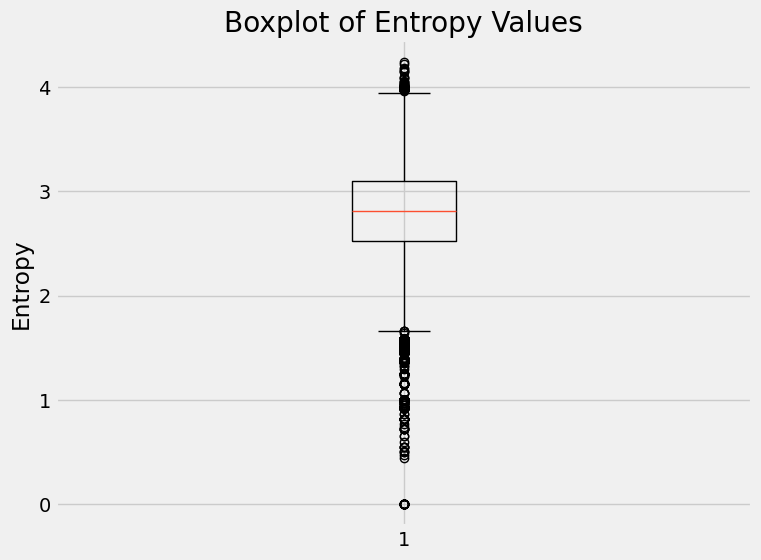

In [45]:
import matplotlib.pyplot as plt

# Create a boxplot of the entropy values
plt.figure(figsize=(8, 6))
plt.boxplot(df_entropy['entropy'])
plt.title('Boxplot of Entropy Values')
plt.ylabel('Entropy')
plt.show()

The entropy values are between 0 and 1.

An entropy value of 0 means that all characters in the username are identical, indicating maximum predictability.
A value of 1, on the other hand, means maximum unpredictability or maximum entropy, which indicates that all characters in the user name are unique and no structure or pattern is recognizable.
The interpretation depends heavily on the specific application. In some cases, low entropy values may indicate that the usernames are easily predictable, while high entropy values may indicate greater diversity or complexity in the usernames.

"predictable" and "interpretable" essentially means same. A low-entropy username is easier to predict or interpret because it has less variety or pattern. A high entropy username is harder to predict or interpret because it has more variety or random patterns.

The entropy was calculated using Shannon entropy (see function above!). This formula is often used to measure the unpredictability of data. For a given column of usernames in the DataFrame, the entropy values were calculated by counting the frequency of each character in the usernames and then calculating the Shannon entropy for that distribution. The higher the entropy, the more unpredictability or diversity there is in the usernames.

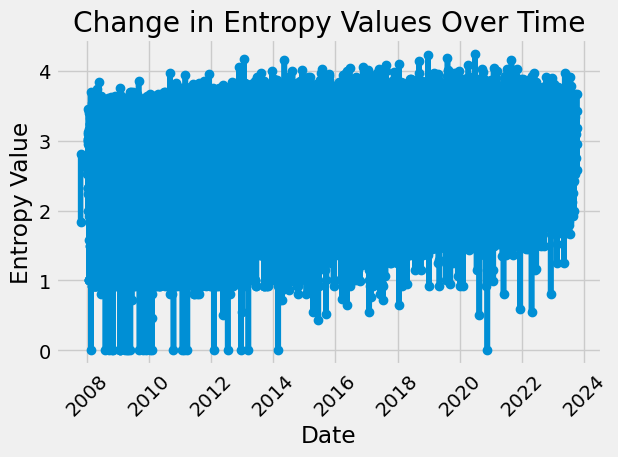

In [46]:
import matplotlib.pyplot as plt

# Assuming df_entropy contains columns 'created_at' and 'entropy'
# Make sure 'created_at' is in DateTime format
df_entropy['created_at'] = pd.to_datetime(df_entropy['created_at'])

# Sort the DataFrame by 'created_at'
df_entropy = df_entropy.sort_values(by='created_at')

# Plot
plt.plot(df_entropy['created_at'], df_entropy['entropy'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Entropy Value')
plt.title('Change in Entropy Values Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

#looks not so readable

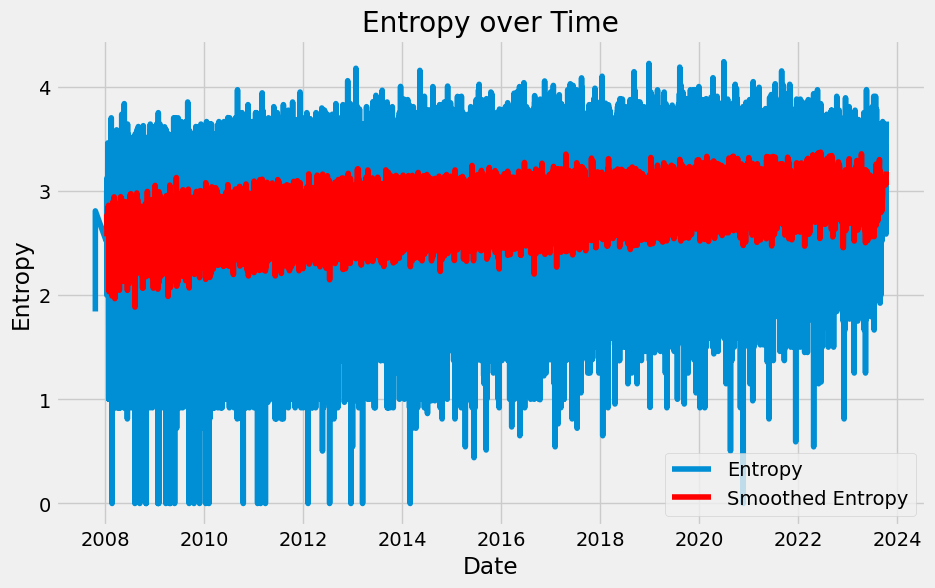

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_entropy is your DataFrame with timestamps and entropy values
# Create a copy of the DataFrame to not alter the timestamps
df_copy = df_entropy.copy()

# Set 'created_at' as the index of the DataFrame
df_copy.set_index('created_at', inplace=True)

# Apply a rolling mean function
smoothed = df_copy['entropy'].rolling(window=10).mean()

# Create a new plot
plt.figure(figsize=(10, 6))

# Plot the entropy values and the smoothed curve
plt.plot(df_copy.index, df_copy['entropy'], label='Entropy')
plt.plot(df_copy.index, smoothed, label='Smoothed Entropy', color='red')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Entropy')
plt.title('Entropy over Time')
plt.legend()

# Show the plot
plt.show()

In [48]:
# check how to viz this! 
# check how to interpret entropy and create personal branding column

low entropy value in the username indicates that the username is less random or less diverse. This could mean that the username is clearer and easier to remember, which in turn could promote recognition and branding. A clear and consistent username can help build a cohesive online presence and facilitate identity management

#1st Idea
?add a column that indicates whether the personal branding is good or not based on the entropy score?
#set a condition that evaluates the entropy score and sets a value in the new column accordingly.... maybe a function evaluate_branding is defined that receives the entropy value as an argument and decides whether the personal branding is good or not. function is applied to the 'entropy' column of the DataFrame to create a new column 'branding_evaluation' with the corresponding ratings. customizing the condition in the evaluate_branding function to set criteria for good or bad branding?

The Shannon entropy formula calculates the entropy based on the probability distribution of characters in a string. It returns values between 0 and 1, where 0 stands for complete predictability and 1 for maximum unpredictability. For personal branding, one could argue that an entropy value close to 0 indicates that the username is very predictable and potentially easy to remember or recognize. A value of 0.5 would mean that the username has a balanced mix of predictability and unpredictability. A value close to 1 would indicate that the username is very unpredictable and may be difficult to remember or recognize, but can be subjective and depends on the specific branding requirements and objectives. A low entropy score might indicate that the username is easily recognizable, which can be beneficial for good branding in some cases. In other cases, however, a certain amount of unpredictability may be desired to make the branding unique and stand out.

In this case, one could argue that a low entropy value, close to 0, indicates strong and easily memorable personal branding. Such a username would likely be easy to recognize and remember, which could be beneficial for branding. A higher entropy value would indicate that the username is less predictable and may be more difficult to remember.

#2nd IDEA
??add a column indicating whether the personal branding is good or not based on the entropy score and perform a threshold analysis. specify that an entropy score below a certain threshold is considered "good" for branding, while scores above it are considered "not so good".? create a new column called "branding" to indicate whether the personal branding is categorized as "good" or "not so good" based on the entropy value, setting the threshold for the classification. maybe customizing threshold to reflect your specific branding requirements and preferences? 

# here is missing, how we came to this value and why! add later!

In [49]:
from collections import Counter
import math

# Usernames
usernames = ["Amich75", "Aileen-code"]

# Calculate the probability distribution of characters for each username
def calculate_prob_distribution(username):
    username_length = len(username)
    counter = Counter(username)
    prob_distribution = {char: count / username_length for char, count in counter.items()}
    return prob_distribution

# Calculate the Shannon entropy
def calculate_shannon_entropy(prob_distribution):
    entropy = -sum(prob * math.log2(prob) for prob in prob_distribution.values())
    return entropy

# Calculate entropy for each username
for username in usernames:
    prob_distribution = calculate_prob_distribution(username)
    entropy = calculate_shannon_entropy(prob_distribution)
    print(f"Shannon entropy for username '{username}': {entropy}")


Shannon entropy for username 'Amich75': 2.807354922057604
Shannon entropy for username 'Aileen-code': 3.027169118440619


In [50]:
from collections import Counter
import math

# Usernames
usernames = ["Amich75"]

# Calculate the probability distribution of characters for each username
def calculate_prob_distribution(username):
    username_length = len(username)
    counter = Counter(username)
    prob_distribution = {char: count / username_length for char, count in counter.items()}
    return prob_distribution

# Calculate the Shannon entropy
def calculate_shannon_entropy(prob_distribution):
    entropy = -sum(prob * math.log2(prob) for prob in prob_distribution.values())
    return entropy

# Calculate the standardized entropy
def calculate_standardized_entropy(username):
    unique_chars = len(set(username))
    max_entropy = math.log2(unique_chars)
    prob_distribution = calculate_prob_distribution(username)
    entropy = calculate_shannon_entropy(prob_distribution)
    standardized_entropy = entropy / max_entropy
    return standardized_entropy

# Calculate entropy for each username
for username in usernames:
    standardized_entropy = calculate_standardized_entropy(username)
    print(f"Standardized entropy for username '{username}': {standardized_entropy}")


Standardized entropy for username 'Amich75': 1.0


In [122]:
import math

def calculate_entropy(username):
    # Count the frequency of each character
    char_count = {}
    for char in username:
        char_count[char] = char_count.get(char, 0) + 1

    # Calculate the probability of each character
    probabilities = [count / len(username) for count in char_count.values()]

    # Calculate entropy
    entropy = -sum(p * math.log2(p) for p in probabilities)
    return entropy

def calculate_standardized_entropy(username):
    entropy = calculate_entropy(username)
    max_entropy = math.log2(len(username))
    standardized_entropy = entropy / max_entropy
    return standardized_entropy

# Test the function
username = "Amich75"
entropy = calculate_standardized_entropy(username)
print(f"Standardized entropy of username '{username}': {entropy}")


Standardized entropy of username 'Amich75': 1.0


In [52]:
import string

def generate_username_variations(username):
    variations = []
    # Remove one character at a time
    for i in range(len(username)):
        variation = username[:i] + username[i+1:]
        variations.append(variation)
    # Add one character at a time
    for char in string.ascii_lowercase + string.digits:
        for i in range(len(username) + 1):
            variation = username[:i] + char + username[i:]
            variations.append(variation)
    # Replace one character at a time
    for i in range(len(username)):
        for char in string.ascii_lowercase + string.digits:
            variation = username[:i] + char + username[i+1:]
            variations.append(variation)
    return variations

# Calculate entropy for each variation
for variation in generate_username_variations("Amich75"):
    entropy = calculate_standardized_entropy(variation)
    if entropy < 0.4:
        print(f"Username variation '{variation}' has entropy below 0.4: {entropy}")


In [53]:
#2nd idea
# Assumed threshold for branding
#threshold = 0.2

# Function to classify branding based on entropy value
#def classify_branding(entropy):
#    if entropy <= threshold:
#        return 'Good'
#    else:
#       return 'Not so good'

# Adding the branding classification column to the DataFrame
# df_entropy['branding'] = df_entropy['entropy'].apply(classify_branding)


In [54]:
import math

# Assume df_entropy is your DataFrame with the 'entropy' column
# Calculate the number of unique characters in the alphabet (N)
unique_characters = set(''.join(df_entropy['username']))
N = len(unique_characters)

# Calculate the logarithm base 2 of N
log_N = math.log2(N)

# Calculate the standardized entropy values and add them as a new column
df_entropy['standardized_entropy'] = df_entropy['entropy'] / log_N
print(df_entropy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140941 entries, 5362 to 22310
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   username              140941 non-null  object             
 1   type                  140941 non-null  object             
 2   site_admin            140941 non-null  bool               
 3   public_repos          140941 non-null  int64              
 4   public_gists          140941 non-null  int64              
 5   followers             140941 non-null  int64              
 6   following             140941 non-null  int64              
 7   created_at            140941 non-null  datetime64[ns, UTC]
 8   updated_at            140941 non-null  datetime64[ns, UTC]
 9   duration              140941 non-null  timedelta64[ns]    
 10  entropy               140941 non-null  float64            
 11  standardized_entropy  140941 non-null  float64         

In [55]:
# Sort the DataFrame by the 'standardized_entropy' column
sorted_df = df_entropy.sort_values(by='standardized_entropy')

# Print the username with the lowest standardized_entropy
user_with_lowest_entropy = sorted_df.iloc[0]['username']
print("User with lowest standardized_entropy:", user_with_lowest_entropy)

# Print the username with the highest standardized_entropy
user_with_highest_entropy = sorted_df.iloc[-1]['username']
print("User with highest standardized_entropy:", user_with_highest_entropy)

# Print the username with a median standardized_entropy
median_index = len(sorted_df) // 2
user_with_median_entropy = sorted_df.iloc[median_index]['username']
print("User with median standardized_entropy:", user_with_median_entropy)


User with lowest standardized_entropy: q
User with highest standardized_entropy: PClub-Ahmedabad-University
User with median standardized_entropy: mpenkov


In [56]:
# Sort the DataFrame by the 'standardized_entropy' column
sorted_df = df_entropy.sort_values(by='standardized_entropy')

# Print the username with the lowest standardized_entropy and its value
user_with_lowest_entropy = sorted_df.iloc[0]['username']
lowest_entropy_value = sorted_df.iloc[0]['standardized_entropy']
print("User with lowest standardized_entropy:", user_with_lowest_entropy)
print("Standardized entropy value:", lowest_entropy_value)

# Print the username with the highest standardized_entropy and its value
user_with_highest_entropy = sorted_df.iloc[-1]['username']
highest_entropy_value = sorted_df.iloc[-1]['standardized_entropy']
print("User with highest standardized_entropy:", user_with_highest_entropy)
print("Standardized entropy value:", highest_entropy_value)

# Print the username with a median standardized_entropy and its value
median_index = len(sorted_df) // 2
user_with_median_entropy = sorted_df.iloc[median_index]['username']
median_entropy_value = sorted_df.iloc[median_index]['standardized_entropy']
print("User with median standardized_entropy:", user_with_median_entropy)
print("Standardized entropy value:", median_entropy_value)


User with lowest standardized_entropy: q
Standardized entropy value: 0.0
User with highest standardized_entropy: PClub-Ahmedabad-University
Standardized entropy value: 0.7091689381882919
User with median standardized_entropy: mpenkov
Standardized entropy value: 0.46967098044385963


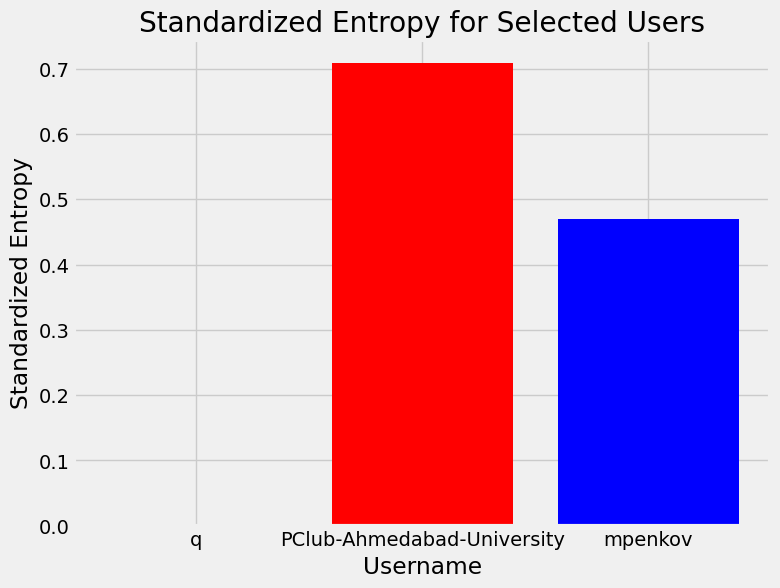

In [57]:
import matplotlib.pyplot as plt

# Sort the dataset by the 'standardized_entropy' column
sorted_df = df_entropy.sort_values(by='standardized_entropy')

# Select the users with the lowest, highest, and median standardized entropy values
lowest_entropy_user = sorted_df.iloc[0]
highest_entropy_user = sorted_df.iloc[-1]
median_entropy_user = sorted_df.iloc[len(sorted_df) // 2]

# Create a bar plot for the selected users
plt.figure(figsize=(8, 6))
plt.bar([lowest_entropy_user['username'], highest_entropy_user['username'], median_entropy_user['username']],
        [lowest_entropy_user['standardized_entropy'], highest_entropy_user['standardized_entropy'], median_entropy_user['standardized_entropy']],
        color=['green', 'red', 'blue'])
plt.xlabel('Username')
plt.ylabel('Standardized Entropy')
plt.title('Standardized Entropy for Selected Users')
plt.show()



In [ ]:
#anonymized

In [113]:
# Find users with standardized entropy similar to the lowest, highest, and median users
similar_low_entropy_user = df_entropy[(df_entropy['standardized_entropy'] >= lowest_entropy_user['standardized_entropy'] - 0.05) & 
                                      (df_entropy['standardized_entropy'] <= lowest_entropy_user['standardized_entropy'] + 0.05) &
                                      (df_entropy['username'] != lowest_entropy_user['username'])].sample(1).iloc[0]

similar_high_entropy_user = df_entropy[(df_entropy['standardized_entropy'] >= highest_entropy_user['standardized_entropy'] - 0.05) & 
                                       (df_entropy['standardized_entropy'] <= highest_entropy_user['standardized_entropy'] + 0.05) &
                                       (df_entropy['username'] != highest_entropy_user['username'])].sample(1).iloc[0]

similar_median_entropy_user = df_entropy[(df_entropy['standardized_entropy'] >= median_entropy_user['standardized_entropy'] - 0.05) & 
                                         (df_entropy['standardized_entropy'] <= median_entropy_user['standardized_entropy'] + 0.05) &
                                         (df_entropy['username'] != median_entropy_user['username'])].sample(1).iloc[0]

# Print the anonymized usernames with their entropy values
print("Anonymized username with similar low entropy:", similar_low_entropy_user['username'])
print("Standardized entropy value:", similar_low_entropy_user['standardized_entropy'])

print("Anonymized username with similar high entropy:", similar_high_entropy_user['username'])
print("Standardized entropy value:", similar_high_entropy_user['standardized_entropy'])

print("Anonymized username with similar median entropy:", similar_median_entropy_user['username'])
print("Standardized entropy value:", similar_median_entropy_user['standardized_entropy'])



Anonymized username with similar low entropy: p
Standardized entropy value: 0.0
Anonymized username with similar high entropy: MGI-tech-bioinformatics
Standardized entropy value: 0.6640146823761262
Anonymized username with similar median entropy: AwsafAlam
Standardized entropy value: 0.4559733845293963


In [58]:
# check whether the values of standardized_entropy are from 0 to 1 instead of being higher than 1 now
df_entropy.describe()
#check! max of standardized_entropy ist 0.71

,public_repos,public_gists,followers,following,duration,entropy,standardized_entropy
count,"140,941.00","140,941.00","140,941.00","140,941.00",140941,"140,941.00","140,941.00"
mean,76.35,17.06,285.12,142.30,3110 days 05:00:05.696000384,2.78,0.47
std,356.19,255.33,"1,160.41","1,801.76",1443 days 21:36:35.828777424,0.43,0.07
min,0.00,0.00,0.00,0.00,0 days 00:00:00,0.00,0.00
25%,19.00,0.00,88.00,5.00,2037 days 00:00:00,2.52,0.42
50%,42.00,2.00,123.00,28.00,3283 days 00:00:00,2.81,0.47
75%,81.00,13.00,217.00,92.00,4255 days 00:00:00,3.10,0.52
max,"50,000.00","62,057.00","192,033.00","302,941.00",5823 days 00:00:00,4.24,0.71


In [114]:
# Describe the column 'standardized_entropy'
entropy_description = df_entropy['standardized_entropy'].describe()
print(entropy_description)


count   140,941.00
mean          0.47
std           0.07
min           0.00
25%           0.42
50%           0.47
75%           0.52
max           0.71
Name: standardized_entropy, dtype: float64


In [59]:
# now it makes sense to translate those stand_entropy values into kind of classifications like low, high, medium 
# depending on the values we received in the describe_function from 0 to 0.71
# to make those values more "readable" for the audience

# Define thresholds for low, medium, and high entropy
low_threshold = 0.33  # Adjust as needed
high_threshold = 0.66  # Adjust as needed

# Function to classify standardized entropy values
def classify_entropy(standardized_entropy):
    if standardized_entropy < low_threshold:
        return 'Low'
    elif standardized_entropy < high_threshold:
        return 'Medium'
    else:
        return 'High'

# Add a new column with the entropy classification
df_entropy['entropy_classification'] = df_entropy['standardized_entropy'].apply(classify_entropy)
print(df_entropy.info())


<class 'pandas.core.frame.DataFrame'>
Index: 140941 entries, 5362 to 22310
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   username                140941 non-null  object             
 1   type                    140941 non-null  object             
 2   site_admin              140941 non-null  bool               
 3   public_repos            140941 non-null  int64              
 4   public_gists            140941 non-null  int64              
 5   followers               140941 non-null  int64              
 6   following               140941 non-null  int64              
 7   created_at              140941 non-null  datetime64[ns, UTC]
 8   updated_at              140941 non-null  datetime64[ns, UTC]
 9   duration                140941 non-null  timedelta64[ns]    
 10  entropy                 140941 non-null  float64            
 11  standardized_entropy    14094

In [60]:
# now it necessary to convert the entropy_classification from object to being str
# Convert 'entropy_classification' column to string
df_entropy['entropy_classification'] = df_entropy['entropy_classification'].astype(str)
print(df_entropy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140941 entries, 5362 to 22310
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   username                140941 non-null  object             
 1   type                    140941 non-null  object             
 2   site_admin              140941 non-null  bool               
 3   public_repos            140941 non-null  int64              
 4   public_gists            140941 non-null  int64              
 5   followers               140941 non-null  int64              
 6   following               140941 non-null  int64              
 7   created_at              140941 non-null  datetime64[ns, UTC]
 8   updated_at              140941 non-null  datetime64[ns, UTC]
 9   duration                140941 non-null  timedelta64[ns]    
 10  entropy                 140941 non-null  float64            
 11  standardized_entropy    14094

In [61]:
# Check the type of 'entropy_classification' column
# Check the current data type of the 'entropy_classification' column
print(df_entropy['entropy_classification'].dtype)

# Convert the values in the 'entropy_classification' column to strings
df_entropy['entropy_classification'] = df_entropy['entropy_classification'].astype(str)

# Check the data type of the 'entropy_classification' column again
print(df_entropy['entropy_classification'].dtype)

object
object


In [62]:
df_entropy.columns
# With pandas there are only float, int, bool, datetime64, timedelta - and "object". This includes "string".

Index(['username', 'type', 'site_admin', 'public_repos', 'public_gists',
       'followers', 'following', 'created_at', 'updated_at', 'duration',
       'entropy', 'standardized_entropy', 'entropy_classification'],
      dtype='object')

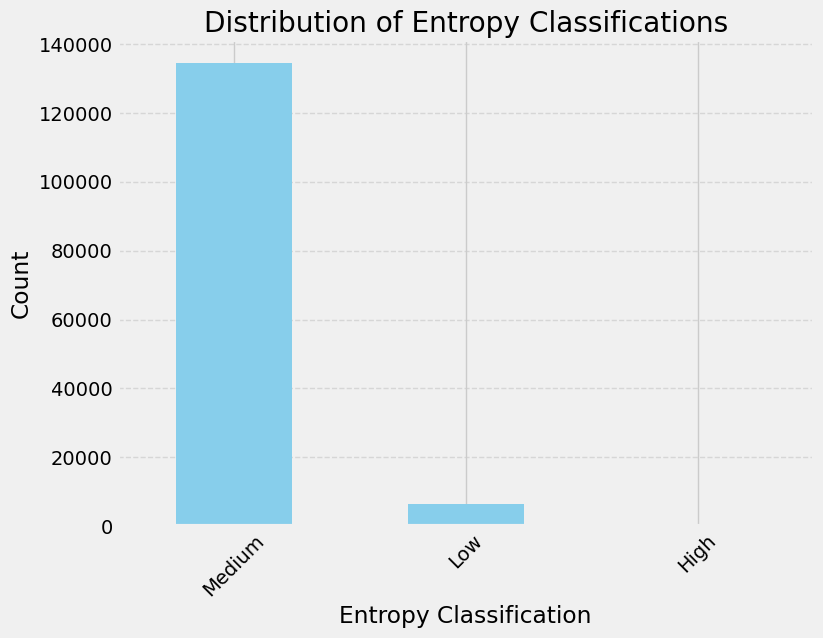

In [63]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'entropy_classification' column
classification_counts = df_entropy['entropy_classification'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Entropy Classifications')
plt.xlabel('Entropy Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

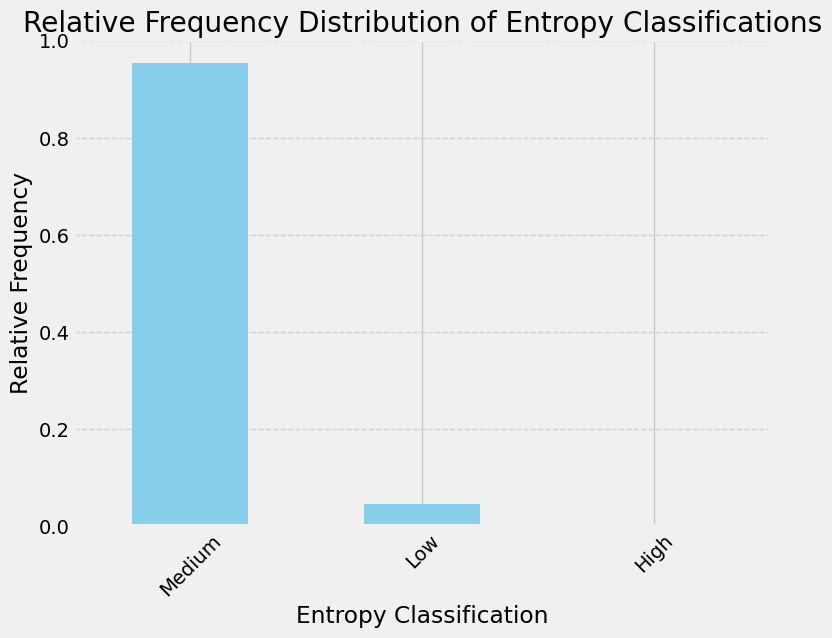

In [64]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'entropy_classification' column
classification_counts = df_entropy['entropy_classification'].value_counts()

# Calculate the relative frequencies
total_classifications = classification_counts.sum()
relative_frequencies = classification_counts / total_classifications

# Create a bar plot
plt.figure(figsize=(8, 6))
relative_frequencies.plot(kind='bar', color='skyblue')
plt.title('Relative Frequency Distribution of Entropy Classifications')
plt.xlabel('Entropy Classification')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

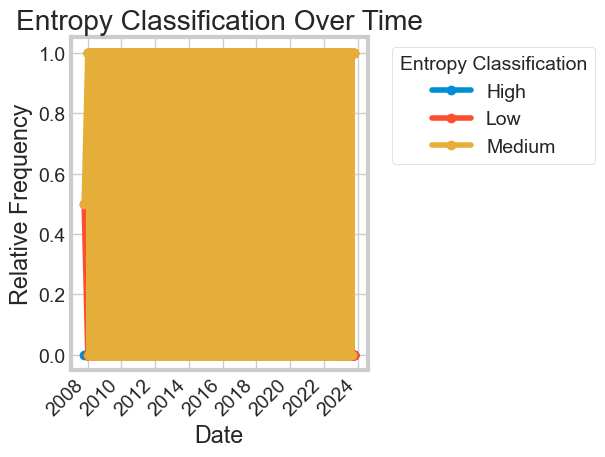

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Group the DataFrame by 'created_at' and 'entropy_classification', and count the occurrences
classification_counts_over_time = df_entropy.groupby(['created_at', 'entropy_classification']).size().unstack(fill_value=0)

# Normalize the counts to get relative frequencies
classification_counts_over_time = classification_counts_over_time.div(classification_counts_over_time.sum(axis=1), axis=0)

# Plot the relative frequencies over time
plt.figure(figsize=(12, 8))
classification_counts_over_time.plot(kind='line', marker='o')
plt.title('Entropy Classification Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Frequency')
plt.legend(title='Entropy Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

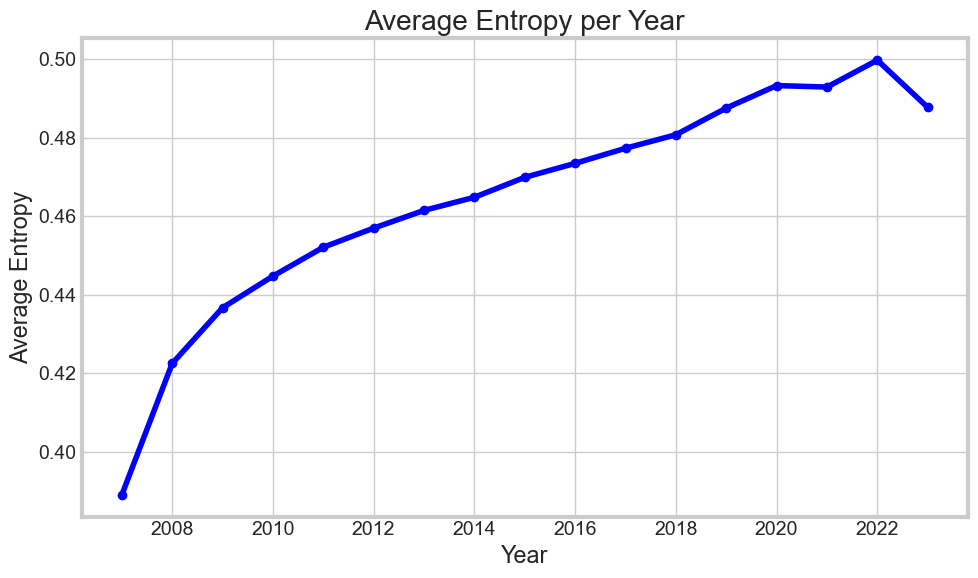

In [66]:
# Extract the year from the 'created_at' column
df_entropy['year'] = df_entropy['created_at'].dt.year

# Group the DataFrame by the 'year' and calculate the mean entropy for each year
average_entropy_per_year = df_entropy.groupby('year')['standardized_entropy'].mean()

# Plot the average entropy per year
plt.figure(figsize=(10, 6))
average_entropy_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Average Entropy per Year')
plt.xlabel('Year')
plt.ylabel('Average Entropy')
plt.grid(True)
plt.tight_layout()
plt.show()

It appears that at least one of the groups of entropy values for a given year contains fewer than three data points, which invalidates the Shapiro-Wilk test. The Shapiro-Wilk test requires at least three data points to be performed.

checked: 2007 (first year just has two entries)

Adding the condition if year != df_entropy['year'].min(): ensures that the Shapiro-Wilk test is only performed for years that are not the first year in the data series.

In [67]:
from scipy.stats import shapiro

# Shapiro-Wilk-Test für jedes Jahr durchführen (ohne das erste Jahr)
for year, data in df_entropy.groupby('year')['standardized_entropy']:
    if year != df_entropy['year'].min():
        stat, p = shapiro(data)
        print(f"Year {year}: Statistics={stat}, p={p}")



Year 2008: Statistics=0.9660714268684387, p=2.957602377715424e-33
Year 2009: Statistics=0.9628039598464966, p=2.384575583756898e-40
Year 2010: Statistics=0.9706340432167053, p=2.4559156885756744e-41
Year 2011: Statistics=0.9758431315422058, p=6.099852215205929e-42
Year 2012: Statistics=0.9766380786895752, p=1.975830834697992e-42
Year 2013: Statistics=0.9775817394256592, p=1.0467699528506384e-41
Year 2014: Statistics=0.9782664775848389, p=1.3895709974768827e-39
Year 2015: Statistics=0.9766350984573364, p=2.3301589604917723e-39
Year 2016: Statistics=0.9805465936660767, p=2.347004906519834e-35
Year 2017: Statistics=0.9809102416038513, p=1.0669865244129961e-32
Year 2018: Statistics=0.9797894954681396, p=8.369643204761523e-32
Year 2019: Statistics=0.9805022478103638, p=3.6139118459985363e-29
Year 2020: Statistics=0.9773394465446472, p=2.3633219883734025e-31
Year 2021: Statistics=0.9801232218742371, p=2.335053075802229e-28
Year 2022: Statistics=0.9761411547660828, p=5.980254181530388e-28
Yea

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base_capstone/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro-Wilk tests for each year (excluding the first year) show that all p-values are significantly smaller than 0.05, indicating that we can reject the null hypothesis of normal distribution. This means that the entropy values for each year are not normally distributed.

Since the entropy values are not normally distributed, we should be careful when performing the t-test, as the t-test assumes a normal distribution of the data. If the data is not normally distributed, the t-test may give unreliable results. In such cases, alternative statistical tests can be used that are less prone to violating the normal distribution assumption.

Since the entropy values for each year represent independent samples and the data are not normally distributed, we can use the non-parametric Kruskal-Wallis test. This test is a non-parametric alternative to the ANOVA test and allows us to determine whether there are significant differences between the groups without making the assumption of a normal distribution of the data.

In [68]:
from scipy.stats import kruskal

# Extract entropy values for each year
entropy_per_year = [data for year, data in df_entropy.groupby('year')['standardized_entropy']]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*entropy_per_year)

print("Kruskal-Wallis Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis Test:
Statistic: 8632.054091503403
P-value: 0.0


The Kruskal-Wallis test compares the distributions of entropy values across different groups, in this case, different years. So, if the p-value is less than a chosen significance level (e.g., 0.05), it indicates that there is a statistically significant difference in entropy values among the years.

if the Kruskal-Wallis test resulted in a significant p-value for the entire dataset, including the year 2022, it would imply that there is a significant difference in entropy values across all years, including 2022.

For comparing the year 2022 specifically with other years or within itself, you can consider using pairwise statistical tests such as the Dunn's test or the Wilcoxon rank-sum test (Mann-Whitney U test) with appropriate adjustments for multiple comparisons. These tests can help identify which specific years differ significantly from each other in terms of entropy values.

Terminal!
pip install scikit-posthocs

In [69]:
pip install scikit-posthocs


Note: you may need to restart the kernel to use updated packages.


In [70]:
from scikit_posthocs import posthoc_dunn

# Perform Dunn's test for pairwise comparisons
dunn_results = posthoc_dunn(df_entropy, val_col='standardized_entropy', group_col='year', p_adjust='holm')

# Print the pairwise comparison results
print(dunn_results)


      2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
2007  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00   
2008  1.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2009  1.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2010  1.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2011  1.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2012  1.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00   
2013  1.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00   
2014  1.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00   
2015  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.01  0.00  0.00   
2016  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.01  1.00  0.00  0.00   
2017  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.02   
2018  1.00  0.00  0.00  0.00  0.00  0.00

This indicates that the entropy of 2022 may have changed in recent years,

In [71]:
unique_years = df_entropy['year'].unique()
print(unique_years)


[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023]


In [72]:
from scipy.stats import kruskal

# Extract the entropy values for each year
entropy_2022 = df_entropy.loc[df_entropy['year'] == 2022, 'standardized_entropy']
other_years_entropy = df_entropy.loc[df_entropy['year'] != 2022, 'standardized_entropy']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(entropy_2022, other_years_entropy)

print("Kruskal-Wallis Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")



Kruskal-Wallis Test:
Statistic: 1183.064311375079
P-value: 2.923603552479895e-259


The result of the Kruskal-Wallis test shows that there is a significant difference in the standardized entropy values between years. The statistic value is high, and the p-value is very close to or equal to zero, indicating that the entropy values are significantly different between years.

In [73]:
from scikit_posthocs import posthoc_conover

# Prepare the data for the Conover test
data_2022 = df_entropy.loc[df_entropy['year'] == 2022, 'standardized_entropy']
other_years_data = df_entropy.loc[df_entropy['year'] != 2022, 'standardized_entropy']

# Perform the Conover test
conover_results = posthoc_conover([data_2022, other_years_data])
print(conover_results)



     1    2
1 1.00 0.00
2 0.00 1.00


The value at row 1, column 1 represents the comparison of group 1 (2022) with itself, which is always 1.00 (indicating no difference, as expected).
The value at row 1, column 2 represents the comparison of group 1 (2022) with group 2 (other years), and vice versa. These p-values suggest whether there's a significant difference between the entropy scores of 2022 and the other years.
With both values being close to 0.00, it indicates a statistically significant difference between the entropy scores of 2022 and the other years.

This means that there is a significant difference in the entropy values between the year 2022 and the other years. In other words, the entropy of usernames in GitHub in 2022 is significantly different from the entropy values of the other years, based on the results of the Conover test.

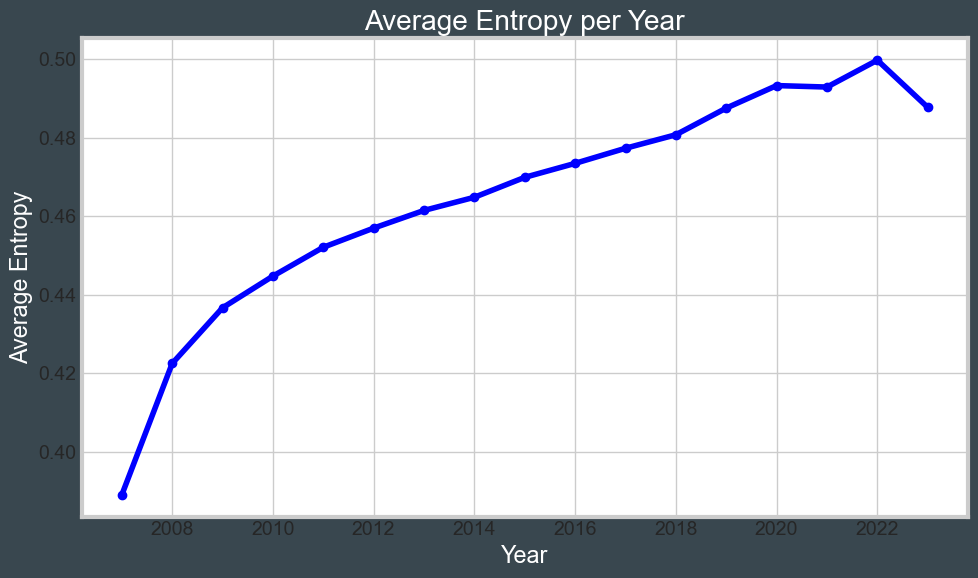

In [74]:
# Extract the year from the 'created_at' column
df_entropy['year'] = df_entropy['created_at'].dt.year

# Group the DataFrame by the 'year' and calculate the mean entropy for each year
average_entropy_per_year = df_entropy.groupby('year')['standardized_entropy'].mean()

# Plot the average entropy per year
plt.figure(figsize=(10, 6), facecolor='#39474f', edgecolor='#39474f')  # Set background and edge color
average_entropy_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Average Entropy per Year', color='white')  # Set title color
plt.xlabel('Year', color='white')  # Set x-axis label color
plt.ylabel('Average Entropy', color='white')  # Set y-axis label color
plt.grid(True)
plt.tight_layout()
plt.show()


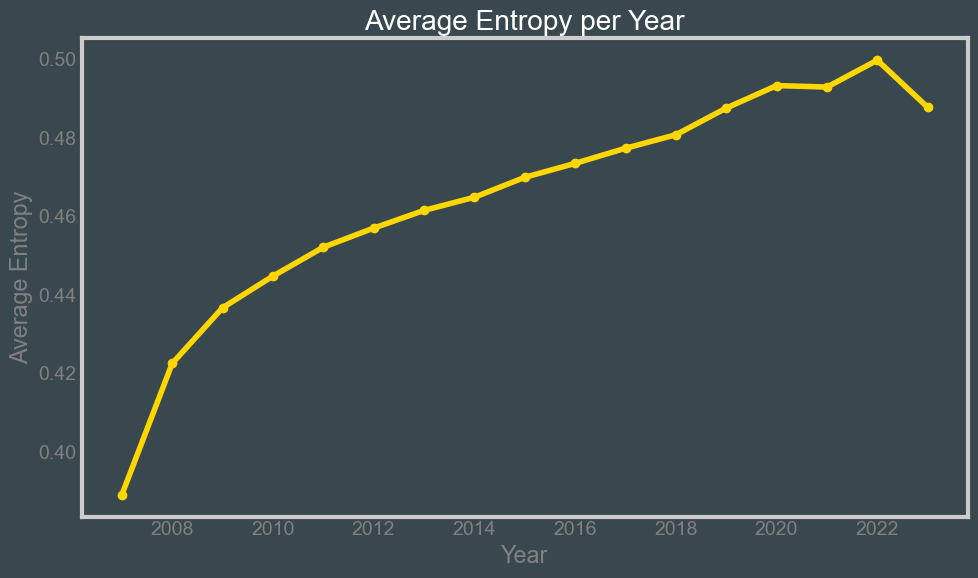

In [75]:
# Extract the year from the 'created_at' column
df_entropy['year'] = df_entropy['created_at'].dt.year

# Group the DataFrame by the 'year' and calculate the mean entropy for each year
average_entropy_per_year = df_entropy.groupby('year')['standardized_entropy'].mean()

# Plot the average entropy per year
plt.figure(figsize=(10, 6), facecolor='#39474f', edgecolor='#39474f')  # Set background and edge color
plt.plot(average_entropy_per_year.index, average_entropy_per_year, marker='o', color='gold')  # Set line color to gold
plt.title('Average Entropy per Year', color='white')  # Set title color
plt.xlabel('Year', color='white')  # Set x-axis label color
plt.ylabel('Average Entropy', color='white')  # Set y-axis label color

# Set axes color to gray
ax = plt.gca()
ax.tick_params(axis='x', colors='gray')  # Set x-axis tick color
ax.tick_params(axis='y', colors='gray')  # Set y-axis tick color

# Set axes labels color to gray
ax.xaxis.label.set_color('gray')  # Set x-axis label color
ax.yaxis.label.set_color('gray')  # Set y-axis label color

# Set background color to gray
plt.gca().set_facecolor('#39474f')

plt.grid(False)  # Remove grid
plt.tight_layout()
plt.show()







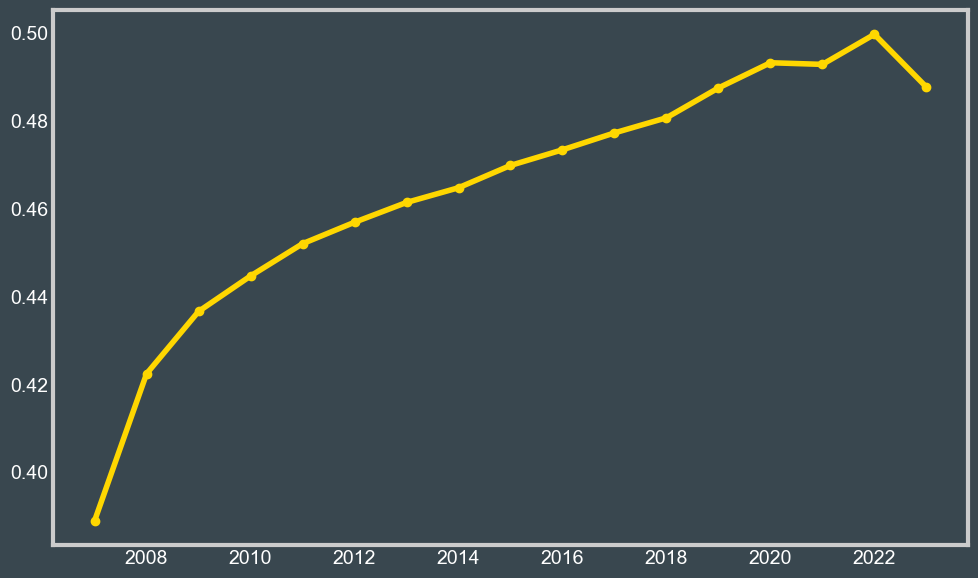

In [76]:
# Extract the year from the 'created_at' column
df_entropy['year'] = df_entropy['created_at'].dt.year

# Group the DataFrame by the 'year' and calculate the mean entropy for each year
average_entropy_per_year = df_entropy.groupby('year')['standardized_entropy'].mean()

# Plot the average entropy per year
plt.figure(figsize=(10, 6), facecolor='#39474f', edgecolor='#39474f')  # Set background and edge color
plt.plot(average_entropy_per_year.index, average_entropy_per_year, marker='o', color='gold')  # Set line color to gold
plt.xlabel('', color='white')  # Remove x-axis label
plt.ylabel('', color='white')  # Remove y-axis label

# Set axes color to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')  # Set x-axis tick color
ax.tick_params(axis='y', colors='white')  # Set y-axis tick color

# Set axes labels color to white
ax.xaxis.label.set_color('white')  # Set x-axis label color
ax.yaxis.label.set_color('white')  # Set y-axis label color

# Set background color to gray
plt.gca().set_facecolor('#39474f')

plt.grid(False)  # Remove grid

plt.tight_layout()
plt.show()



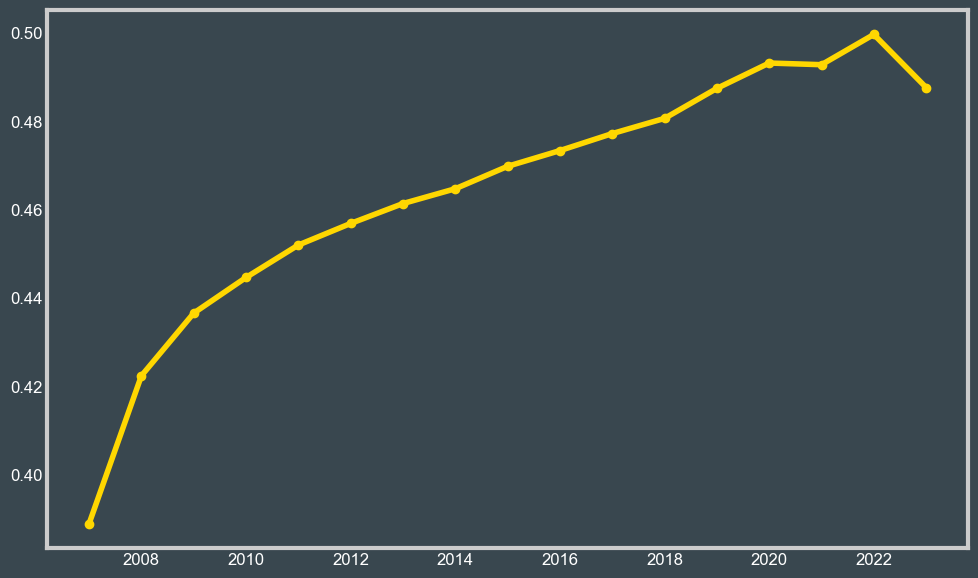

In [77]:
# Extract the year from the 'created_at' column
df_entropy['year'] = df_entropy['created_at'].dt.year

# Group the DataFrame by the 'year' and calculate the mean entropy for each year
average_entropy_per_year = df_entropy.groupby('year')['standardized_entropy'].mean()

# Plot the average entropy per year
plt.figure(figsize=(10, 6), facecolor='#39474f', edgecolor='#39474f')  # Set background and edge color
plt.plot(average_entropy_per_year.index, average_entropy_per_year, marker='o', color='gold')  # Set line color to gold
plt.xlabel('', color='white')  # Remove x-axis label
plt.ylabel('', color='white')  # Remove y-axis label

# Set axes color to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white', labelsize=12)  # Set x-axis tick color and size
ax.tick_params(axis='y', colors='white', labelsize=12)  # Set y-axis tick color and size

# Set axes labels color to white
ax.xaxis.label.set_color('white')  # Set x-axis label color
ax.yaxis.label.set_color('white')  # Set y-axis label color

# Set background color to gray
plt.gca().set_facecolor('#39474f')

plt.grid(False)  # Remove grid

plt.tight_layout()
plt.show()


In [78]:
# from 2022 you can see that the entropy value decreases steeply. is this significant? check
from scipy import stats

# Extract standardized entropy values for the years 2022 and now
entropy_2022 = df_entropy[df_entropy['created_at'].dt.year == 2022]['standardized_entropy']
entropy_now = df_entropy[df_entropy['created_at'].dt.year == 2024]['standardized_entropy']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(entropy_2022, entropy_now)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The difference in average standardized entropy between 2022 and now is statistically significant.")
else:
    print("There is not enough evidence to conclude that the difference in average standardized entropy between 2022 and now is statistically significant.")

T-statistic: nan
P-value: nan
There is not enough evidence to conclude that the difference in average standardized entropy between 2022 and now is statistically significant.


In [79]:
from scipy import stats

# Extract standardized entropy values for the years 2022 and now
entropy_2022 = df_entropy[df_entropy['created_at'].dt.year == 2022]['standardized_entropy']
entropy_now = df_entropy[df_entropy['created_at'].dt.year == 2024]['standardized_entropy']

# Perform error checking to ensure that there are valid values
if entropy_2022.empty or entropy_now.empty:
    print("One or both of the datasets contain no valid values. Unable to perform the t-test.")
else:
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(entropy_2022, entropy_now)

    # Print the results
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    # Interpret the results
    if not np.isnan(t_statistic) and not np.isnan(p_value):
        if p_value < 0.05:
            print("The difference in average standardized entropy between 2022 and now is statistically significant.")
        else:
            print("There is not enough evidence to conclude that the difference in average standardized entropy between 2022 and now is statistically significant.")
    else:
        print("One or both of the datasets contain invalid values. Unable to perform the t-test.")


One or both of the datasets contain no valid values. Unable to perform the t-test.


In [80]:
# Count missing values in each column
missing_values = df_entropy.isnull().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
username                  0
type                      0
site_admin                0
public_repos              0
public_gists              0
followers                 0
following                 0
created_at                0
updated_at                0
duration                  0
entropy                   0
standardized_entropy      0
entropy_classification    0
year                      0
dtype: int64


In [81]:
# then there must be invalid values?
# Check data types of each column
print(df_entropy.dtypes)

# Check for invalid values in numeric columns (e.g., negative values)
numeric_columns = df_entropy.select_dtypes(include=['int', 'float']).columns
invalid_numeric_values = df_entropy[numeric_columns].lt(0).any()
print("Invalid numeric values:")
print(invalid_numeric_values)

# Check for invalid values in categorical columns (e.g., missing or unexpected categories)
categorical_columns = df_entropy.select_dtypes(include=['object', 'category']).columns
invalid_categorical_values = df_entropy[categorical_columns].isin(['', 'unknown', 'NA']).any()
print("Invalid categorical values:")
print(invalid_categorical_values)

username                               object
type                                   object
site_admin                               bool
public_repos                            int64
public_gists                            int64
followers                               int64
following                               int64
created_at                datetime64[ns, UTC]
updated_at                datetime64[ns, UTC]
duration                      timedelta64[ns]
entropy                               float64
standardized_entropy                  float64
entropy_classification                 object
year                                    int32
dtype: object
Invalid numeric values:
public_repos            False
public_gists            False
followers               False
following               False
entropy                 False
standardized_entropy    False
year                    False
dtype: bool
Invalid categorical values:
username                  False
type                      False
entr

In [82]:
# Check for missing or unexpected categories in categorical columns
invalid_categorical_values = df_entropy.select_dtypes(include=['object']).isin(['', 'unknown', 'NA']).any()
print("Invalid categorical values:")
print(invalid_categorical_values)

Invalid categorical values:
username                  False
type                      False
entropy_classification    False
dtype: bool


In [83]:
from scipy.stats import ttest_ind

# Group the DataFrame by year
grouped = df_entropy.groupby('year')

# Dictionary to store t-test results for each year
t_test_results = {}

# Perform t-test for each year
for year, group in grouped:
    # Filter data for the current year
    data_year = group['standardized_entropy']
    # Perform t-test comparing the standardized entropy of the current year with 2022
    t_statistic, p_value = ttest_ind(data_year, df_entropy[df_entropy['year'] == 2022]['standardized_entropy'])
    # Store t-test results for the current year
    t_test_results[year] = {'T-statistic': t_statistic, 'P-value': p_value}

# Display t-test results for each year
for year, result in t_test_results.items():
    print(f"T-test results for year {year}:")
    print(f"T-statistic: {result['T-statistic']}")
    print(f"P-value: {result['P-value']}")
    if result['P-value'] < 0.05:
        print("The difference is statistically significant.")
    else:
        print("There is not enough evidence to conclude that the difference is statistically significant.")
    print()

T-test results for year 2007:
T-statistic: -2.4726797124690445
P-value: 0.01344396677542805
The difference is statistically significant.

T-test results for year 2008:
T-statistic: -52.599383440072664
P-value: 0.0
The difference is statistically significant.

T-test results for year 2009:
T-statistic: -47.368097506933374
P-value: 0.0
The difference is statistically significant.

T-test results for year 2010:
T-statistic: -44.8841588017279
P-value: 0.0
The difference is statistically significant.

T-test results for year 2011:
T-statistic: -40.926946417327706
P-value: 0.0
The difference is statistically significant.

T-test results for year 2012:
T-statistic: -37.587072148307264
P-value: 3.402778371249494e-298
The difference is statistically significant.

T-test results for year 2013:
T-statistic: -34.410584041724995
P-value: 1.1144538892448507e-251
The difference is statistically significant.

T-test results for year 2014:
T-statistic: -30.7793797387348
P-value: 1.3402710615514354e-202

In [84]:
# checking all years as view...
import pandas as pd
from scipy.stats import ttest_ind

# Create an empty list to store the results
results = []

# Extract the year from the 'created_at' column
df_entropy['year'] = df_entropy['created_at'].dt.year

# Perform the t-test for each year and store the results in the list
for year in range(2007, 2025):
    # Filter the data for the current year
    data_year = df_entropy[df_entropy['year'] == year]
    
    # Print the number of observations for the current year
    num_observations = len(data_year)
    print(f'Number of observations for year {year}: {num_observations}')
    
    # Continue with the t-test only if there are enough observations
    if num_observations >= 2:
        # Split the data into two groups: before 2022 and from 2022 onwards
        data_before_2022 = data_year[data_year['year'] < 2022]['standardized_entropy']
        data_after_2022 = data_year[data_year['year'] >= 2022]['standardized_entropy']
        
        # Perform the t-test
        t_statistic, p_value = ttest_ind(data_before_2022, data_after_2022)
        
        # Append the results to the list
        results.append({'Year': year, 'T-statistic': t_statistic, 'P-value': p_value})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)





Number of observations for year 2007: 2
Number of observations for year 2008: 5179
Number of observations for year 2009: 7621
Number of observations for year 2010: 10266
Number of observations for year 2011: 13009
Number of observations for year 2012: 13894
Number of observations for year 2013: 13835
Number of observations for year 2014: 12426
Number of observations for year 2015: 11371
Number of observations for year 2016: 10426
Number of observations for year 2017: 8787
Number of observations for year 2018: 7771
Number of observations for year 2019: 6604
Number of observations for year 2020: 6707
Number of observations for year 2021: 6084
Number of observations for year 2022: 4922
Number of observations for year 2023: 2037
Number of observations for year 2024: 0
    Year  T-statistic  P-value
0   2007          NaN      NaN
1   2008          NaN      NaN
2   2009          NaN      NaN
3   2010          NaN      NaN
4   2011          NaN      NaN
5   2012          NaN      NaN
6   2013

In [85]:
# how many usernames have been created per year? 
# Group the data by year and count the number of usernames in each group
username_counts_per_year = df_entropy.groupby(df_entropy['created_at'].dt.year)['username'].count()

# Print the counts
print("Number of usernames created per year:")
print(username_counts_per_year)


Number of usernames created per year:
created_at
2007        2
2008     5179
2009     7621
2010    10266
2011    13009
2012    13894
2013    13835
2014    12426
2015    11371
2016    10426
2017     8787
2018     7771
2019     6604
2020     6707
2021     6084
2022     4922
2023     2037
Name: username, dtype: int64


In [86]:
# 2007 and 2024 needs to be disregarded as there are too less or no values

In [87]:
#The results of the t-test show that the standardized entropy values for each year are statistically significantly 
#different compared to the standardized entropy values for the reference year (2022). 
# 2022 was choosen, because there the value sank 
#This indicates that there are significant differences in the standardized entropy values across years in your dataset.

In [88]:
# To investigate the significance of the trend since 2022 in more detail
# trying now a linear regression to calculate the p-value for the trend over time. 
# determine whether the observed decrease in 
# standardized entropy values since 2022 is statistically significant.

from scipy.stats import linregress

# Führen Sie eine lineare Regression durch
slope, intercept, r_value, p_value, std_err = linregress(df_entropy['year'], df_entropy['standardized_entropy'])

# Geben Sie den p-Wert aus
print("P-value for the trend since 2022:", p_value)


P-value for the trend since 2022: 0.0


In [89]:
# The P-value of 0.0 indicates that the trend since 2022 is statistically significant, 
# which means that the decrease in standardized entropy values since 2022 is very likely not random, 
# but represents a real trend.

In [90]:
from scipy.stats import ttest_1samp
# Filter the data to exclude the years 2007 and 2024
df_filtered = df_entropy[(df_entropy['year'] != 2007) & (df_entropy['year'] != 2024)]

# Initialize an empty DataFrame to store the T-test results
t_test_results = pd.DataFrame(columns=['Year', 'T-statistic', 'P-value'])

# Perform the T-test for each year and save the results in the DataFrame
for year in range(2008, 2024):
    # Filter the data for the current year
    data_year = df_filtered[df_filtered['year'] == year]
    
    # Perform the T-test for the current year
    t_statistic, p_value = ttest_1samp(data_year['standardized_entropy'], 0)
    
    # Add the results to the DataFrame
    t_test_results.loc[len(t_test_results)] = [year, t_statistic, p_value]

# Display the results of the T-test
print(t_test_results)




       Year  T-statistic  P-value
0  2,008.00       368.14     0.00
1  2,009.00       486.14     0.00
2  2,010.00       608.78     0.00
3  2,011.00       717.37     0.00
4  2,012.00       764.58     0.00
5  2,013.00       794.26     0.00
6  2,014.00       751.36     0.00
7  2,015.00       734.79     0.00
8  2,016.00       714.36     0.00
9  2,017.00       650.67     0.00
10 2,018.00       633.07     0.00
11 2,019.00       594.82     0.00
12 2,020.00       610.71     0.00
13 2,021.00       588.97     0.00
14 2,022.00       553.45     0.00
15 2,023.00       342.55     0.00


In [91]:
#the year looks not good? seems to be in float? check that!
# Convert the 'Year' column to integer format for better representation
t_test_results['Year'] = t_test_results['Year'].astype(int)

# Display the updated t-test results
print(t_test_results)


    Year  T-statistic  P-value
0   2008       368.14     0.00
1   2009       486.14     0.00
2   2010       608.78     0.00
3   2011       717.37     0.00
4   2012       764.58     0.00
5   2013       794.26     0.00
6   2014       751.36     0.00
7   2015       734.79     0.00
8   2016       714.36     0.00
9   2017       650.67     0.00
10  2018       633.07     0.00
11  2019       594.82     0.00
12  2020       610.71     0.00
13  2021       588.97     0.00
14  2022       553.45     0.00
15  2023       342.55     0.00


T-test results for each year from 2008 to 2023. Here's what we did and how to interpret the results:

Preparing the data: First, we prepared the data for each year by running the T-test to see if the average standardized_entropy values were statistically significantly different between years.
Interpretation of results: The T-statistic measures the size of the difference between groups relative to the variability within groups. The larger the T-statistic, the more likely it is that the observed difference is not due to chance.

The P-value indicates the probability that the observed differences are due to chance. A P-value less than the significance level (usually 0.05) indicates that the differences are probably not due to chance and are therefore statistically significant.Interpretation of the results: In our case, we found that for each year from 2008 to 2023, the P-value is very small (close to 0), indicating that the differences in average standardized_entropy values between years are statistically significant. This means that the average entropy values have changed significantly over time. Significance for analysis: These results may indicate that usernames have changed over time and may be an indicator of changing trends or practices in username naming.

The T-statistic is a measure of how significant the difference between the means of two groups is, measured by the variance of the data and the size of the sample. In this case, we used the T-test to examine whether the mean standardized entropy scores differed significantly between years.

A higher T-statistic indicates that the difference between the means is greater and therefore the probability of a significant difference between the groups increases. In our case, a higher T-statistic means that the differences in the average entropy values between the years are greater and therefore more significant.

in your case, the differences between years are most significant in the years with the highest T-statistics and the lowest P-values. This means that the differences in the average standardized entropy values between these years are strongest and most significant.

# question: do we lose power of testing by using the group-by of year-groups? check!
We may lose statistical power???

Reduced sample size: when we divide the data into time groups, the number of observations in each group is reduced. A smaller sample size can affect the ability of the t-test to detect small but real differences between groups.

Increased variance within groups: Grouping the data into time groups can lead to increased variance within groups, especially if there is large variation within groups. Increased variance can blur the differences between the groups and reduce the statistical power of the t-test.

Loss of information: By grouping the data, subtle differences and variations in the data may be lost, especially if the time groups are too coarse. This loss of information can have a negative impact on the ability of the t-test to detect subtle differences between the groups.

Overall, grouping data into time groups can reduce the statistical power of a t-test, especially if grouping leads to a reduction in sample size, increased variance within groups and a loss of information. It is important to carefully consider the trade-offs and choose the grouping method that is best suited to answer the specific questions of your analysis.

In [92]:
print(df_entropy.columns)

Index(['username', 'type', 'site_admin', 'public_repos', 'public_gists',
       'followers', 'following', 'created_at', 'updated_at', 'duration',
       'entropy', 'standardized_entropy', 'entropy_classification', 'year'],
      dtype='object')


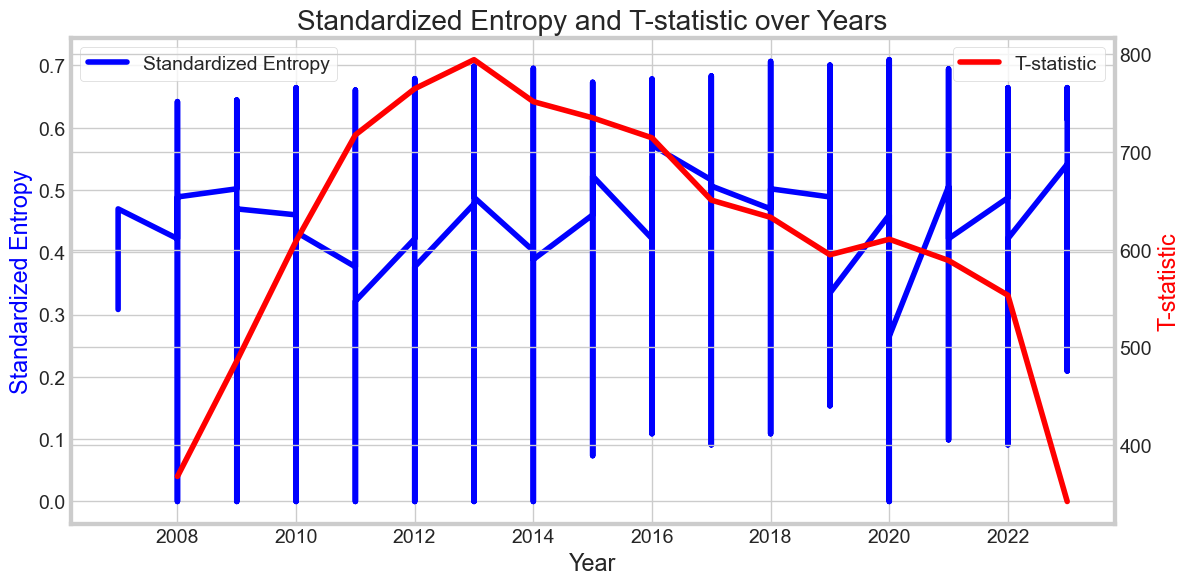

In [93]:
# viz
import matplotlib.pyplot as plt

# Plot the standardized entropy values
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df_entropy['year'], df_entropy['standardized_entropy'], color='b', label='Standardized Entropy')

# Create a secondary y-axis for T-statistics
ax2 = ax1.twinx()
ax2.plot(t_test_results['Year'], t_test_results['T-statistic'], color='r', label='T-statistic')

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Standardized Entropy', color='b')
ax2.set_ylabel('T-statistic', color='r')
plt.title('Standardized Entropy and T-statistic over Years')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



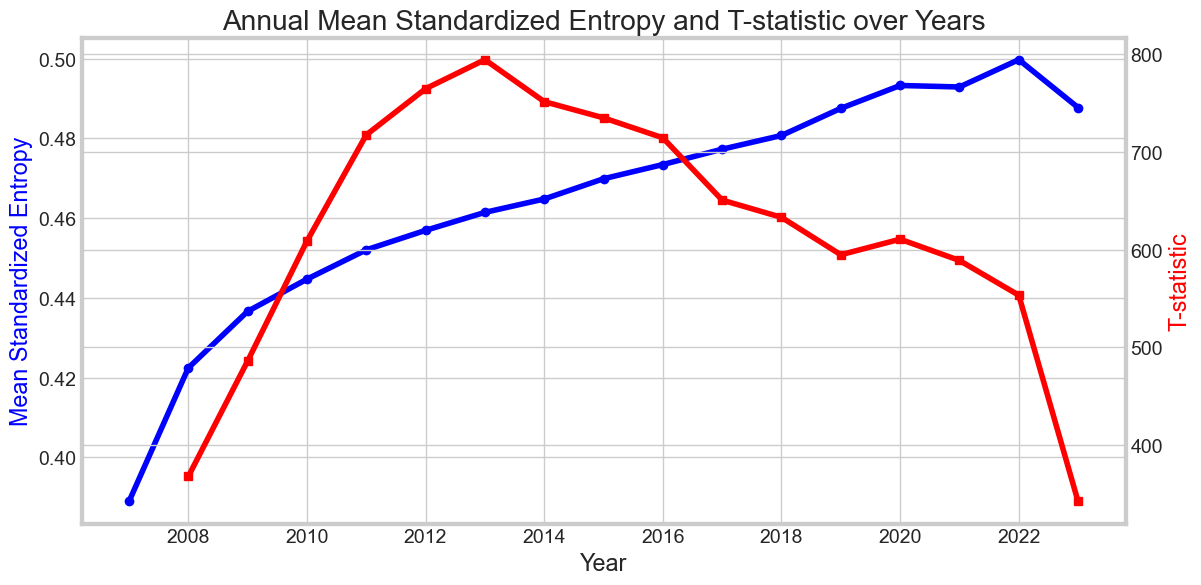

In [94]:
# looks not so nice. better to use the mean values of stand. entropy? try
import matplotlib.pyplot as plt

# Calculate the annual mean for standardized entropy
annual_mean_entropy = df_entropy.groupby('year')['standardized_entropy'].mean().reset_index()

# Plot both the annual mean of standardized entropy and the T-statistics
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the standardized entropy values
ax1.plot(annual_mean_entropy['year'], annual_mean_entropy['standardized_entropy'], color='b', marker='o', label='Mean Standardized Entropy')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Standardized Entropy', color='b')

# Create a secondary y-axis for T-statistics
ax2 = ax1.twinx()
ax2.plot(t_test_results['Year'], t_test_results['T-statistic'], color='r', marker='s', label='T-statistic')
ax2.set_ylabel('T-statistic', color='r')

# Set labels and title
plt.title('Annual Mean Standardized Entropy and T-statistic over Years')
plt.grid(True)
plt.show()


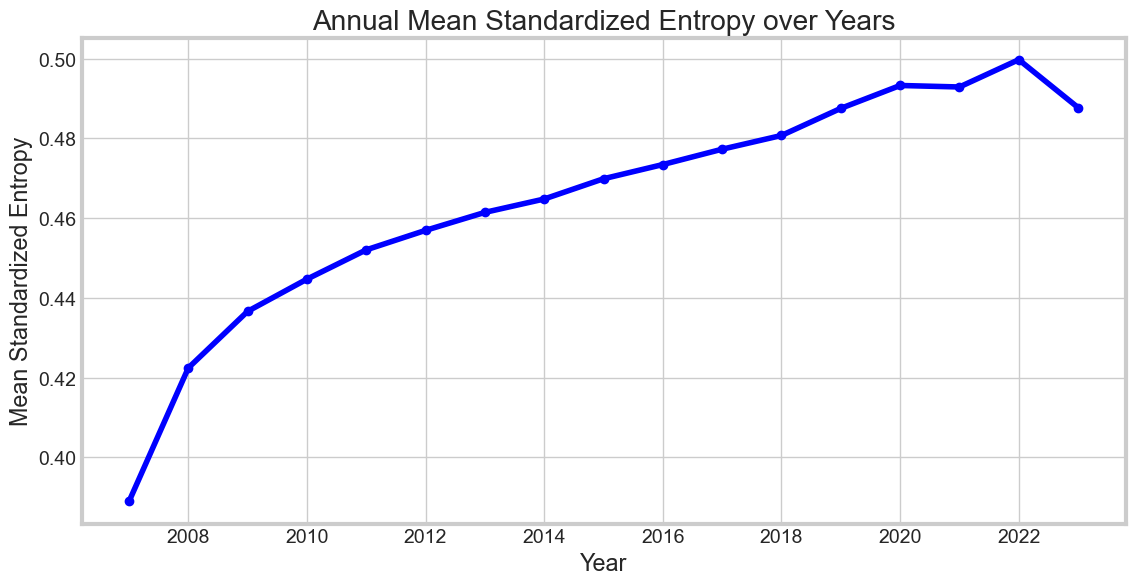

In [95]:
import matplotlib.pyplot as plt

# Calculate the annual mean for standardized entropy
annual_mean_entropy = df_entropy.groupby('year')['standardized_entropy'].mean().reset_index()

# Plot the annual mean of standardized entropy
plt.figure(figsize=(12, 6))
plt.plot(annual_mean_entropy['year'], annual_mean_entropy['standardized_entropy'], color='b', marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Standardized Entropy')
plt.title('Annual Mean Standardized Entropy over Years')
plt.grid(True)
plt.show()


Relationship between entropy and significance: If the blue line of entropy increases or decreases and the red line of the T-statistic is high at the same time, this means that the change in entropy is statistically significant. If the blue line rises or falls but the red line is low, this means that the change in entropy is not statistically significant.
Trend analysis: By looking at the progression of both lines over time, you can identify trends in how entropy changes over time and whether these changes are statistically significant?

In [96]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Daten ab dem Jahr 2022 auswählen
df_filtered = df_entropy[df_entropy['year'] >= 2022]

# Jahr als unabhängige Variable (Feature) und durchschnittlichen Entropiewert als abhängige Variable (Ziel) auswählen
X = df_filtered[['year']]
y = df_filtered['standardized_entropy']

# Lineare Regression initialisieren und anpassen
regression_model = LinearRegression()
regression_model.fit(X, y)

# Koeffizienten der unabhängigen Variable (Jahr) ausgeben
print("Coefficient:", regression_model.coef_[0])

# Interpretation des Ergebnisses
if regression_model.coef_[0] > 0:
    print("Positive coefficient indicates increasing trend.")
elif regression_model.coef_[0] < 0:
    print("Negative coefficient indicates decreasing trend.")
else:
    print("Coefficient is close to zero, indicating no significant trend.")



Coefficient: -0.01201612237221884
Negative coefficient indicates decreasing trend.


check: 
The negative coefficient indicates that there is a decreasing trend in the average entropy value from 2022 onwards. This means that the average entropy is expected to decrease over time.

We chose linear regression because it is a simple and effective method to model the trend over time. With linear regression, we can examine and quantify the relationship between the independent variable (in this case, time) and the dependent variable (the average entropy). By calculating the linear trend, we can determine whether entropy is significantly decreasing or increasing over time.

for quantifying the trend over time, we perform a linear regression and examine whether the time variable (year) has a significant influence on the dependent variable (e.g. standardized entropy). We want to interpret the coefficient for the time variable to see if there is a significant trend.

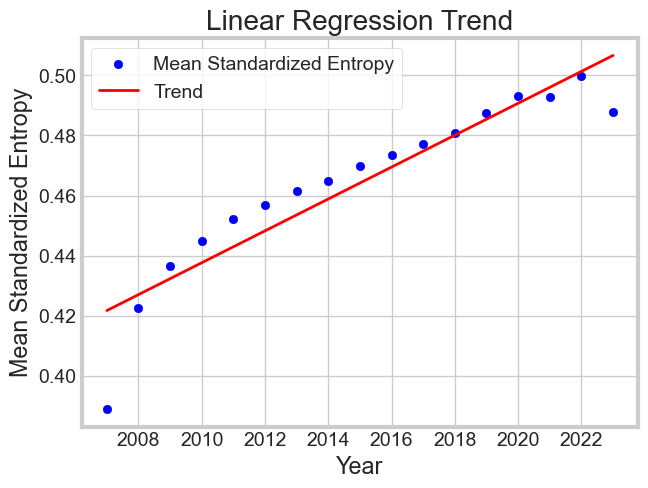

In [97]:
# better to plot regression results? try and save results of linear regression 
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean of standardized entropy for each year
mean_entropy_per_year = df_entropy.groupby('year')['standardized_entropy'].mean().reset_index()

# Fit the linear regression
coefficients = np.polyfit(mean_entropy_per_year['year'], mean_entropy_per_year['standardized_entropy'], 1)

# Calculate the regression line
x_values = mean_entropy_per_year['year']
y_values = np.polyval(coefficients, x_values)

# Scatter plot of the data points (mean standardized entropy per year)
plt.scatter(mean_entropy_per_year['year'], mean_entropy_per_year['standardized_entropy'], color='blue', label='Mean Standardized Entropy')

# Plot the regression line
plt.plot(x_values, y_values, color='red', linewidth=2, label='Trend')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Mean Standardized Entropy')
plt.title('Linear Regression Trend')
plt.legend()

# Show plot
plt.show()





we want to investigate the statistical significance of changes over time and the t-test is not suitable due to the grouping of data into time intervals, there are several alternative approaches we now consider in addition to the above linear regression. 

keep in mind for later? Some of these are:

Mann-Whitney U test: This test is a non-parametric alternative to the t-test and is used if the assumptions of the t-test are violated, e.g. if the data are not normally distributed or the variances between the groups are not homogeneous.

Kruskal-Wallis test: This is a non-parametric alternative to the one-way ANOVA and is used when you want to compare the means of more than two independent groups, but the assumptions of normal distribution and homogeneous variance are not met.

Repeated Measures ANOVA: This test is used when you want to compare the means of several measurements of the same group over time. It takes into account the correlation between the repeated measures and makes it possible to consider both within- and between-group differences.

what could also be a reason for this trend? check the rules for creating usernames over times maybe? 

Explore data: Examine the distribution of data, Identify outliers and correlations between variables.

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base_capstone/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base_capstone/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base_capstone/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base_capstone/lib/python3.9/site-packages

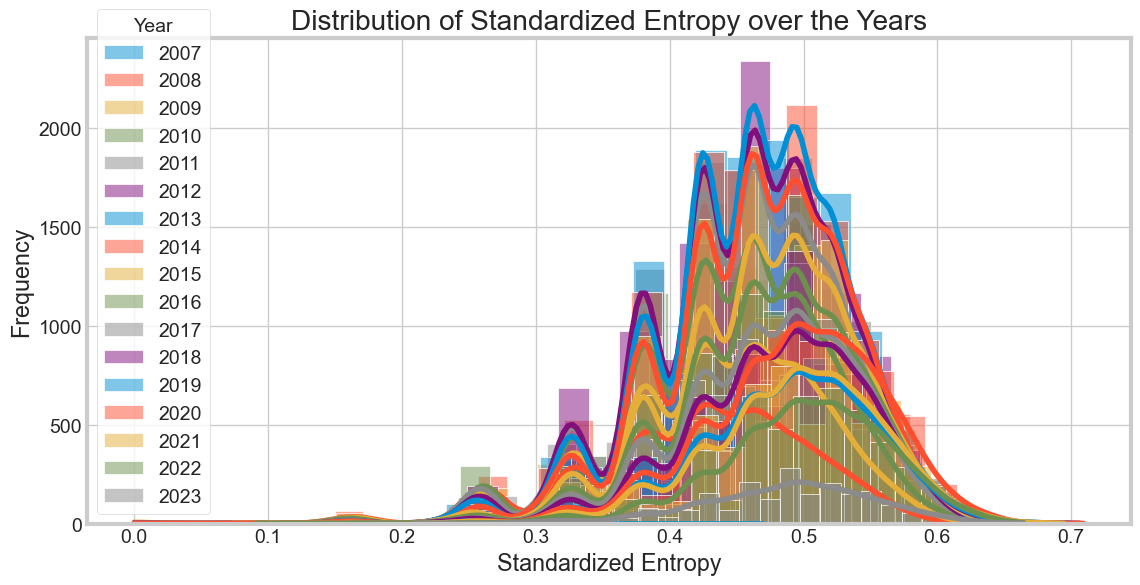

In [98]:
# distribution of stand. entropy over years
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the histogram for each year
plt.figure(figsize=(12, 6))
for year in range(2007, 2025):
    # Filter the data for the current year
    data_year = df_entropy[df_entropy['year'] == year]
    
    # Plot the histogram for the current year
    sns.histplot(data=data_year['standardized_entropy'], bins=30, kde=True, label=str(year), alpha=0.5)

# Add labels and title
plt.xlabel('Standardized Entropy')
plt.ylabel('Frequency')
plt.title('Distribution of Standardized Entropy over the Years')
plt.legend(title='Year')
plt.show()


In [99]:
# confirm that this seems to be normal distribution

from scipy.stats import shapiro, anderson

# Example data
data = df_entropy['standardized_entropy']

# Shapiro-Wilk Test
stat_shapiro, p_shapiro = shapiro(data)
print("Shapiro-Wilk Test:")
print("Statistic:", stat_shapiro)
print("P-value:", p_shapiro)
if p_shapiro > 0.05:
    print("The data may be normally distributed (p > 0.05).")
else:
    print("The data is not normally distributed (p <= 0.05).")

# Anderson-Darling Test
result_anderson = anderson(data)
print("\nAnderson-Darling Test:")
print("Statistic:", result_anderson.statistic)
print("Critical Values:", result_anderson.critical_values)
print("Significance Level:", result_anderson.significance_level)
if result_anderson.statistic < result_anderson.critical_values[2]:
    print("The data may be normally distributed (Test statistic < Critical value).")
else:
    print("The data is not normally distributed (Test statistic >= Critical value).")


Shapiro-Wilk Test:
Statistic: 0.975402295589447
P-value: 0.0
The data is not normally distributed (p <= 0.05).

Anderson-Darling Test:
Statistic: 747.7617924409569
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Level: [15.  10.   5.   2.5  1. ]
The data is not normally distributed (Test statistic >= Critical value).


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base_capstone/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



The Shapiro-Wilk test and Anderson-Darling test both indicate that the data is not normally distributed. The p-value of the Shapiro-Wilk test is less than 0.05, indicating significant departure from normality. Additionally, the test statistic of the Anderson-Darling test is greater than the critical value at the 5% significance level, suggesting that the data does not follow a normal distribution.

This means that the standardized entropy values do not follow a normal distribution. In statistical analysis, many techniques assume that the data is normally distributed. When the data is not normally distributed, these assumptions may not hold, and the results of the analysis may be unreliable. Therefore, it's important to consider alternative methods or perform transformations to make the data more closely approximate a normal distribution before applying certain statistical techniques.

and now? 


reg. linear regression can still be applied even if the data is not normally distributed. right? However, when the data violates the assumption of normality, the interpretation of the regression coefficients and predictions may need to be done with caution. Additionally, alternative regression techniques, such as robust regression, may be considered to address the issue of non-normality in the data.

In [100]:
# try robust regression 

from sklearn.linear_model import HuberRegressor

# Prepare the data
X = df_entropy[['year']]  # Features
y = df_entropy['standardized_entropy']  # Target variable

# Robust linear regression
huber = HuberRegressor().fit(X, y)

# Extract the coefficients and intercept of the regression line
coefficient = huber.coef_[0]
intercept = huber.intercept_

# Output the coefficients and intercept
print("Coefficient:", coefficient)
print("Intercept:", intercept)



Coefficient: 0.00023401348933293462
Intercept: -0.00010165470096011076


# some further problems needs to be checked

The coefficient represents the slope of the robust regression line, and the intercept represents the point where the regression line intersects the y-axis. In this case:

Coefficient: 0.00023401348933293462
Intercept: -0.00010165470096011076
This means that for each unit increase in the year, the standardized entropy value increases by approximately 0.000234, starting from an initial value of approximately -0.000102.

# that can not be true somehow! 
how can the trend be increasing if the standardized entropy values are falling from 2022?

 it seems contradictory. If the standardized entropy values are decreasing after 2022, it suggests a downward trend, which contradicts the upward trend indicated by the regression coefficient. There might be some underlying complexity or variability in the data that the linear regression model does not fully capture. It might be worth exploring alternative modeling approaches or considering other factors that could influence the trend.

# what we could further do maybe? 

One possibility is to explore more flexible regression models that can capture non-linear relationships or patterns in the data. Polynomial regression, spline regression, or generalized additive models (GAMs) are examples of approaches that can handle non-linear trends.

Additionally, you could consider incorporating other variables or features into the model that may better explain the variation in the standardized entropy values over time. These could include external factors or events that may influence entropy, such as changes in technology, policy decisions, or socio-economic factors.

It may also be helpful to visually inspect the data to identify any patterns or anomalies that the regression analysis may have missed. Exploratory data analysis techniques, such as time series decomposition or autocorrelation analysis, can provide insights into the underlying structure of the data and help guide further modeling efforts.

In [101]:
# further try

import statsmodels.api as sm

# Define the dependent variable (standardized entropy) and independent variable (year)
X = df_entropy['year']  # Independent variable
y = df_entropy['standardized_entropy']  # Dependent variable

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fit the robust regression model
robust_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())  # Huber's T norm is used for robust regression
robust_results = robust_model.fit()

# Print the summary of the robust regression model
print(robust_results.summary())


                     Robust linear Model Regression Results                     
Dep. Variable:     standardized_entropy   No. Observations:               140941
Model:                              RLM   Df Residuals:                   140939
Method:                            IRLS   Df Model:                            1
Norm:                            HuberT                                         
Scale Est.:                         mad                                         
Cov Type:                            H1                                         
Date:                  Thu, 29 Feb 2024                                         
Time:                          19:50:38                                         
No. Iterations:                      50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4367      0.094

the model suggests a statistically significant positive relationship between the year and the standardized entropy. This means that, on average, the standardized entropy tends to increase over time.

# that is also not completely true so far

Explore data: Examine the distribution of data, Identify outliers and correlations between variables.

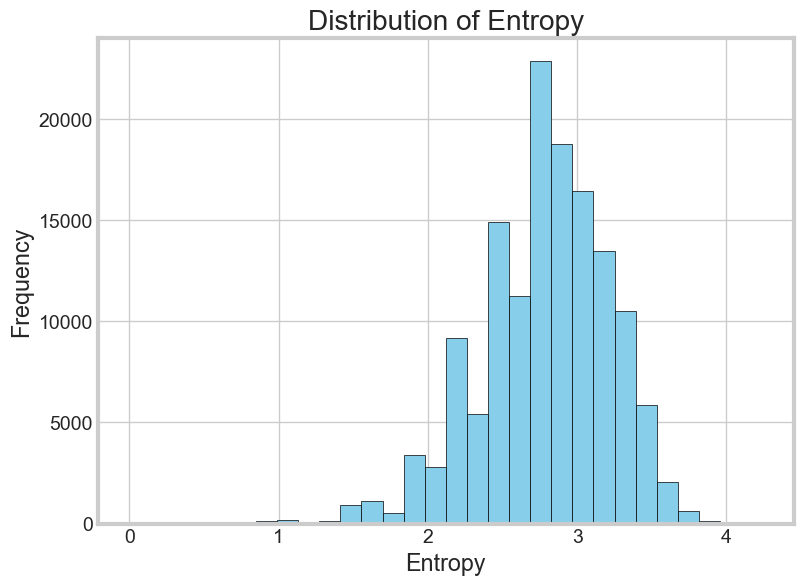

In [102]:
#examine the distribution of data
import matplotlib.pyplot as plt

# Plot histogram of standardized entropy values
plt.figure(figsize=(8, 6))
plt.hist(df_entropy['entropy'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Entropy')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# confirms the above checking. not normal distributed! 

In [103]:
df_entropy.columns

Index(['username', 'type', 'site_admin', 'public_repos', 'public_gists',
       'followers', 'following', 'created_at', 'updated_at', 'duration',
       'entropy', 'standardized_entropy', 'entropy_classification', 'year'],
      dtype='object')

In [104]:
# identify outliers 1st part
# Calculate IQR
Q1 = df_entropy['standardized_entropy'].quantile(0.25)
Q3 = df_entropy['standardized_entropy'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_entropy[(df_entropy['standardized_entropy'] < lower_threshold) | (df_entropy['standardized_entropy'] > upper_threshold)]
print(outliers)


                      username  type  site_admin  public_repos  public_gists  \
66283                       bs  User       False            32            17   
49950                      sam  User       False            41           109   
5344                        ry  User       False            55           301   
11830                       sr  User       False           133            56   
13211                       jm  User       False           133            62   
...                        ...   ...         ...           ...           ...   
51729                 qqq2qqq2  User       False            19             0   
51267                   B7777r  User       False            12             0   
68332                    7GnG7  User       False             2             0   
102622                  prrrrd  User       False             7             0   
103416  Tyrese-FullStackGenius  User       False            79             0   

        followers  following           

# check: outliers being removed or adjusted? 

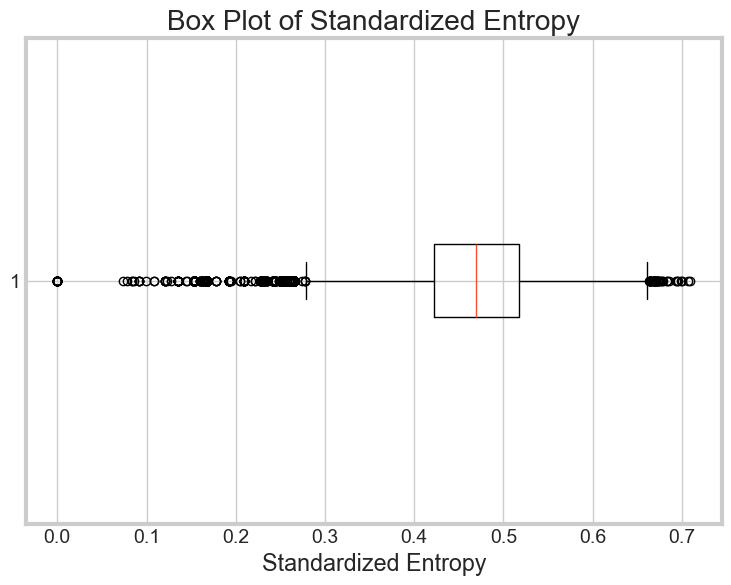

In [105]:
# identify outliers 2nd part
# Create a box plot of standardized entropy values
plt.figure(figsize=(8, 6))
plt.boxplot(df_entropy['standardized_entropy'], vert=False)
plt.title('Box Plot of Standardized Entropy')
plt.xlabel('Standardized Entropy')
plt.grid(True)
plt.show()


# identify outliers for each value? seperately? 

In [106]:
# checking correlations in total 
# Drop non-numeric columns
numeric_df_entropy = df_entropy.select_dtypes(include='number')

# Calculate correlations
correlation_matrix = numeric_df_entropy.corr()
print(correlation_matrix)



                      public_repos  public_gists  followers  following  \
public_repos                  1.00          0.02       0.02       0.04   
public_gists                  0.02          1.00       0.01       0.00   
followers                     0.02          0.01       1.00       0.10   
following                     0.04          0.00       0.10       1.00   
duration                      0.05          0.05       0.06      -0.03   
entropy                      -0.01         -0.01      -0.01       0.01   
standardized_entropy         -0.01         -0.01      -0.01       0.01   
year                         -0.05         -0.05      -0.06       0.03   

                      duration  entropy  standardized_entropy  year  
public_repos              0.05    -0.01                 -0.01 -0.05  
public_gists              0.05    -0.01                 -0.01 -0.05  
followers                 0.06    -0.01                 -0.01 -0.06  
following                -0.03     0.01              

Here's how to interpret it:

Values close to 1 or -1 indicate a strong positive or negative correlation, respectively.
Values close to 0 indicate a weak correlation.
A correlation of 1 means that the variables are perfectly positively correlated, while -1 means they are perfectly negatively correlated.
The diagonal elements (where the row and column names are the same) are always 1 because they represent the correlation of a variable with itself.


# our results e.g.

There is a weak positive correlation between public_repos and followers (0.02).
There is a weak negative correlation between duration and entropy (-0.25).

# seems that there are no strong corrlelations

In [107]:
# checking specific variables of interest here 

# Extract correlation coefficient between 'standardized_entropy' and 'year'
entropy_year_corr = correlation_matrix.loc['standardized_entropy', 'year']
print("Correlation between standardized entropy and year:", entropy_year_corr)


Correlation between standardized entropy and year: 0.24884590281713725


This positive correlation suggests that there is a weak tendency for standardized entropy to increase slightly as the year increases. However, the correlation is not very strong, indicating that the relationship between these variables is not linear or is influenced by other factors.

# maybe check the year of content? 

In [108]:
#where is my current working directory is
#import os
#print(os.getcwd())

In [109]:
#Save the DataFrame as a CSV file
df_entropy.to_csv('df_entropy.csv', index=False)


In [110]:
# Check usernames with top 20 skill list

import pandas as pd

# Assuming df_entropy is your DataFrame and keywords is the list of keywords
keywords = ["SQL", "Communications", "Statistics", "Python", "Computer Science", "Tableau", "Research", "Dashboard", "Visualization", "Writing", "Programming", "Presentations", "Data Quality", "SAS", "Finance", "Data Management", "Leadership", "Analytical Skills", "Project Management", "Git"]

# Count the number of occurrences of each keyword in the "username" column
keyword_counts_username = {keyword: df_entropy['username'].str.contains(keyword).sum() for keyword in keywords}

# Sum of all keyword counts
total_keyword_counts_username = sum(keyword_counts.values())

# Calculate the frequency in percentage
keyword_percentages_username = {keyword: (count / total_keyword_counts) * 100 for keyword, count in keyword_counts.items()}

# Display the results
print("Keyword Counts_username:")
print(keyword_counts_username)
print("\nKeyword Percentages_username:")
print(keyword_percentages_username)


NameError: name 'keyword_counts' is not defined

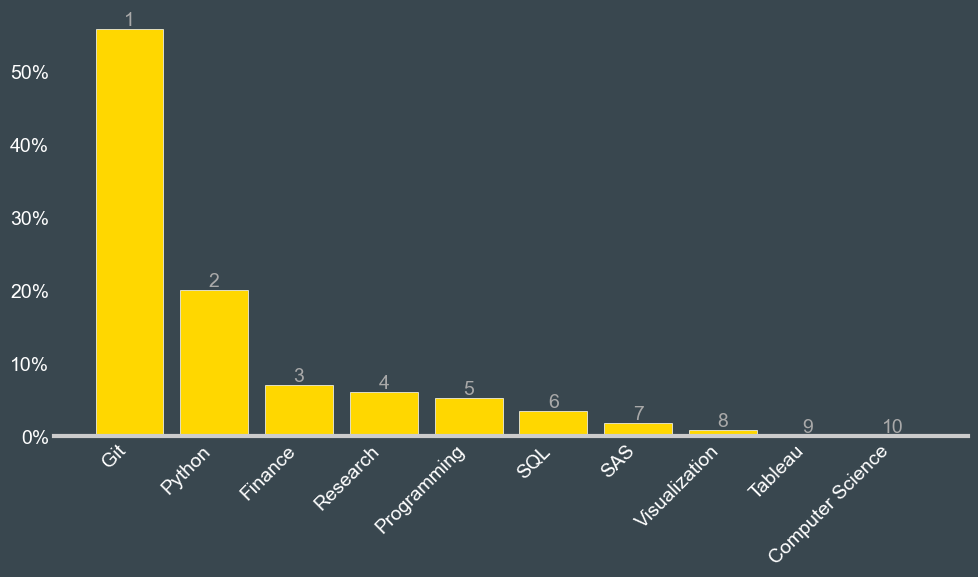

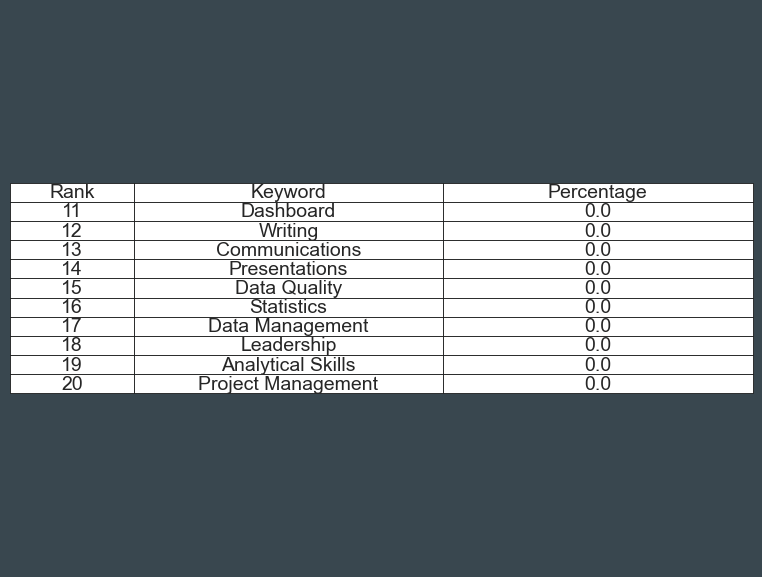

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assume keyword_percentages_username is the dictionary containing the percentage values of the usernames
# Convert the dictionary to a DataFrame for easy use with Matplotlib
keyword_df = pd.DataFrame.from_dict(keyword_percentages_username, orient='index', columns=['Percentage'])

# Sort the DataFrame by percentage values in descending order
keyword_df_sorted = keyword_df.sort_values(by='Percentage', ascending=False)

# Plot for ranks 1 to 10
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#39474f', edgecolor='#39474f')

# Set background and edge color
bars = plt.bar(keyword_df_sorted.index[:10], keyword_df_sorted['Percentage'][:10], color='gold')  # Gold bars

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{i+1}", ha='center', va='bottom', color='darkgray')  # Rank text

# Custom borders, bg
plt.gca().set_facecolor('#39474f')  # Background color
ax.tick_params(axis='both', colors='white')  # White font for axes
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))  # Format y-axis as percentage
ax.yaxis.grid(False)  # Remove y-axis grid lines
ax.xaxis.grid(False)  # Remove x-axis grid lines

plt.xticks(rotation=45, ha='right', color='white')  # Set x-axis ticks color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tight_layout()
plt.show()

# Table for ranks 11 to 20
plt.figure(figsize=(8, 6), facecolor='#39474F', edgecolor='#39474F')

# Set background and edge color
legend_data = keyword_df_sorted.iloc[10:20].reset_index().values.tolist()
legend_data_with_ranks = [[i+11] + row for i, row in enumerate(legend_data)]  # Add ranks
plt.table(cellText=legend_data_with_ranks, colLabels=['Rank', 'Keyword', 'Percentage'],
          loc='center', cellLoc='center', colLoc='center', colWidths=[0.2, 0.5, 0.5])
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6), dpi=300)

